# Fantasy Football Prediction

Michael Sternbach, Alex Szczepanski, Maggie Connors, Connor Hughes, Michael Leahey, Brett Gaebel

Our experiment aims to develop a machine learning algorithm that will predict fantasy football scores. The objective is to build a model that will correctly value player ranking at the end of the season, which fantasy palayers can use when drafting a team before the season starts.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('ffball_project_data_2.csv')

# Creating New Variables - This section involves the process of creating new variables for the dataset. This contributes to requirments 4 and 6

In [ ]:
df = df.sort_values(['player_id','season'])

In [ ]:
df.head()

player_id        player_name position recent_team  season  \
8319  00-0000104        Troy Aikman       QB         DAL    1999   
8320  00-0000104        Troy Aikman       QB         DAL    2000   
2551  00-0000145  Derrick Alexander       WR          KC    1999   
2552  00-0000145  Derrick Alexander       WR          KC    2000   
2553  00-0000145  Derrick Alexander       WR          KC    2001   

      games_played  injured injury type injury severity season ending  ...  \
8319            14        1  concussion           minor            no  ...   
8320            11        1  concussion            mild            no  ...   
2551            16        0         NaN             NaN           NaN  ...   
2552            15        0         NaN             NaN           NaN  ...   
2553            13        1    achilles            mild            no  ...   

      receiving_epa  receiving_2pt_conversions  racr  target_share  \
8319            NaN                        0.0   NaN           NaN   
8320            NaN                        0.0   NaN           NaN   
2551      22.726649                        0.0   0.0      0.216717   
2552      36.469097                        0.0   0.0      0.253858   
2553       2.118593                        0.0   0.0      0.163619   

      air_yards_share  wopr  special_teams_tds  fantasy_points  \
8319              NaN   NaN                0.0          167.80   
8320              NaN   NaN                0.0           63.94   
2551              NaN   NaN                0.0          109.40   
2552              NaN   NaN                0.0          185.00   
2553              NaN   NaN                0.0           66.60   

      fantasy_points_ppr  max_fantasy_points  
8319              167.80               167.8  
8320               63.94               167.8  
2551              163.40               257.0  
2552              257.00               257.0  
2553               93.60               257.0  

[5 rows x 53 columns]

In [ ]:
id_list = df['player_id'].to_list()
team_list = df['recent_team'].to_list()

In [ ]:
# Creates variable if player goes to new team

new_team = []
for i in range(len(id_list)):
    if id_list[i-1] == id_list[i]:
        if team_list[i-1] != team_list[i]:
            new_team.append(1)
        else:
            new_team.append(0)
    else:
        new_team.append(0)


In [ ]:
df['new_team'] = new_team
qb_passing_yards_df = df[df['passing_yards']> 4000]
qb_passing_yards_df = qb_passing_yards_df[['player_id','player_name','position','recent_team','season','passing_yards']]
qb_passing_yards_df['qb_with_4000+_passing'] = 1
temp_df = qb_passing_yards_df[['player_id','season']]
temp_df['season'] = temp_df['season'] + 1
temp_df.head()

<ipython-input-665-b0ab34fe6e58>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['season'] = temp_df['season'] + 1


player_id  season
7654  00-0001218    2000
2945  00-0001361    2003
5107  00-0003292    2003
2221  00-0003739    2005
1044  00-0005106    2000

In [ ]:
id_4000 = temp_df['player_id'].to_list()
season_4000 = temp_df['season'].to_list()

In [ ]:
list_of_tuples = list(zip(id_4000, season_4000))
print(list_of_tuples)
tuples_of_tuples = tuple(list_of_tuples)

[('00-0001218', 2000), ('00-0001361', 2003), ('00-0003292', 2003), ('00-0003739', 2005), ('00-0005106', 2000), ('00-0005106', 2005), ('00-0005106', 2008), ('00-0005106', 2010), ('00-0005741', 2003), ('00-0005755', 2001), ('00-0006355', 2004), ('00-0006355', 2005), ('00-0006355', 2006), ('00-0009311', 2007), ('00-0009311', 2008), ('00-0010346', 2000), ('00-0010346', 2001), ('00-0010346', 2002), ('00-0010346', 2003), ('00-0010346', 2004), ('00-0010346', 2005), ('00-0010346', 2007), ('00-0010346', 2008), ('00-0010346', 2009), ('00-0010346', 2010), ('00-0010346', 2011), ('00-0010346', 2013), ('00-0010346', 2014), ('00-0010346', 2015), ('00-0013042', 2005), ('00-0017200', 2002), ('00-0017200', 2009), ('00-0019596', 2006), ('00-0019596', 2008), ('00-0019596', 2010), ('00-0019596', 2012), ('00-0019596', 2013), ('00-0019596', 2014), ('00-0019596', 2015), ('00-0019596', 2016), ('00-0019596', 2018), ('00-0019596', 2019), ('00-0019596', 2020), ('00-0019596', 2021), ('00-0019596', 2022), ('00-0019

In [ ]:
def find_teams(df, tuples_of_tuples):
    teams = []
    for player_id, season in tuples_of_tuples:
        team = df[(df['player_id'] == player_id) & (df['season'] == season)]['recent_team'].values
        if len(team) > 0:
            teams.append((player_id, season, team[0]))
        else:
            teams.append((player_id, season, 'Team Not Found'))
    return teams

# Use the function
teams_list = find_teams(df, tuples_of_tuples)

# Display the result
for item in teams_list:
    print(f"Player ID: {item[0]}, Season: {item[1]}, Team: {item[2]}")

Player ID: 00-0001218, Season: 2000, Team: CAR
Player ID: 00-0001361, Season: 2003, Team: BUF
Player ID: 00-0003292, Season: 2003, Team: NYG
Player ID: 00-0003739, Season: 2005, Team: MIN
Player ID: 00-0005106, Season: 2000, Team: GB
Player ID: 00-0005106, Season: 2005, Team: GB
Player ID: 00-0005106, Season: 2008, Team: NYJ
Player ID: 00-0005106, Season: 2010, Team: MIN
Player ID: 00-0005741, Season: 2003, Team: LV
Player ID: 00-0005755, Season: 2001, Team: SF
Player ID: 00-0006355, Season: 2004, Team: KC
Player ID: 00-0006355, Season: 2005, Team: KC
Player ID: 00-0006355, Season: 2006, Team: KC
Player ID: 00-0009311, Season: 2007, Team: DET
Player ID: 00-0009311, Season: 2008, Team: DET
Player ID: 00-0010346, Season: 2000, Team: IND
Player ID: 00-0010346, Season: 2001, Team: IND
Player ID: 00-0010346, Season: 2002, Team: IND
Player ID: 00-0010346, Season: 2003, Team: IND
Player ID: 00-0010346, Season: 2004, Team: IND
Player ID: 00-0010346, Season: 2005, Team: IND
Player ID: 00-001034

In [ ]:
filtered_tuples = [(season, team) for player_id, season, team in teams_list if team != "Team Not Found"]

In [ ]:
df['QB_4000_yards'] = 0

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    # Check if the (season, team) pair is in your list of tuples and position is not 'QB'
    if (row['season'], row['recent_team']) in filtered_tuples and row['position'] != 'QB':
        # Update the "QB_4000_yards" column to 1 for rows that meet the criteria
        df.at[index, 'QB_4000_yards'] = 1

In [ ]:
receiving_yards_df = df[df['receiving_yards']> 1000]
receiving_yards_df = receiving_yards_df[['player_id','player_name','position','recent_team','season','receiving_yards']]
temp_df = receiving_yards_df[['player_id','season']]
temp_df['season'] = temp_df['season']+1
id_4000 = temp_df['player_id'].to_list()
season_4000 = temp_df['season'].to_list()

<ipython-input-671-4778ac5bde14>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['season'] = temp_df['season']+1


In [ ]:
list_of_tuples = list(zip(id_4000, season_4000))
print(list_of_tuples)
tuples_of_tuples = tuple(list_of_tuples)

print(tuples_of_tuples)

[('00-0000145', 2001), ('00-0001477', 2002), ('00-0001477', 2003), ('00-0001532', 2001), ('00-0001532', 2002), ('00-0002058', 2000), ('00-0002058', 2001), ('00-0002058', 2002), ('00-0002068', 2002), ('00-0002099', 2000), ('00-0002099', 2001), ('00-0002099', 2002), ('00-0002099', 2003), ('00-0002099', 2005), ('00-0002099', 2007), ('00-0002721', 2000), ('00-0002721', 2001), ('00-0003378', 2000), ('00-0003396', 2002), ('00-0003700', 2000), ('00-0004541', 2003), ('00-0004541', 2005), ('00-0004541', 2006), ('00-0004541', 2007), ('00-0004541', 2008), ('00-0004541', 2009), ('00-0004541', 2010), ('00-0004915', 2008), ('00-0005562', 2000), ('00-0005720', 2006), ('00-0005720', 2007), ('00-0005720', 2008), ('00-0006043', 2000), ('00-0006043', 2006), ('00-0006043', 2007), ('00-0006101', 2001), ('00-0006101', 2005), ('00-0006101', 2008), ('00-0006101', 2009), ('00-0007024', 2000), ('00-0007024', 2001), ('00-0007024', 2002), ('00-0007024', 2003), ('00-0007024', 2004), ('00-0007024', 2005), ('00-0007

In [ ]:
def find_teams(df, tuples_of_tuples):
    teams = []
    for player_id, season in tuples_of_tuples:
        team = df[(df['player_id'] == player_id) & (df['season'] == season)]['recent_team'].values
        if len(team) > 0:
            teams.append((player_id, season, team[0]))
        else:
            teams.append((player_id, season, 'Team Not Found'))
    return teams

# Use the function
teams_list = find_teams(df, tuples_of_tuples)

# Display the result
for item in teams_list:
    print(f"Player ID: {item[0]}, Season: {item[1]}, Team: {item[2]}")

Player ID: 00-0000145, Season: 2001, Team: KC
Player ID: 00-0001477, Season: 2002, Team: CHI
Player ID: 00-0001477, Season: 2003, Team: CHI
Player ID: 00-0001532, Season: 2001, Team: ARI
Player ID: 00-0001532, Season: 2002, Team: ARI
Player ID: 00-0002058, Season: 2000, Team: LV
Player ID: 00-0002058, Season: 2001, Team: LV
Player ID: 00-0002058, Season: 2002, Team: LV
Player ID: 00-0002068, Season: 2002, Team: NE
Player ID: 00-0002099, Season: 2000, Team: LA
Player ID: 00-0002099, Season: 2001, Team: LA
Player ID: 00-0002099, Season: 2002, Team: LA
Player ID: 00-0002099, Season: 2003, Team: LA
Player ID: 00-0002099, Season: 2005, Team: LA
Player ID: 00-0002099, Season: 2007, Team: LA
Player ID: 00-0002721, Season: 2000, Team: MIN
Player ID: 00-0002721, Season: 2001, Team: MIN
Player ID: 00-0003378, Season: 2000, Team: WAS
Player ID: 00-0003396, Season: 2002, Team: LAC
Player ID: 00-0003700, Season: 2000, Team: DET
Player ID: 00-0004541, Season: 2003, Team: GB
Player ID: 00-0004541, Se

In [ ]:
filtered_tuples = [(season, team) for player_id, season, team in teams_list if team != "Team Not Found"]

In [ ]:
df['Receiving_1000_yards'] = 0

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    if (row['season'], row['recent_team']) in filtered_tuples and row['position'] in ('QB', 'RB'):
        df.at[index, 'Receiving_1000_yards'] +=1

In [ ]:
rushing_yards_df = df[df['rushing_yards']> 1000]
rushing_yards_df = rushing_yards_df[['player_id','player_name','position','recent_team','season','rushing_yards']]
temp_df = rushing_yards_df[['player_id','season']]
temp_df['season'] = temp_df['season']+1
id_4000 = temp_df['player_id'].to_list()
season_4000 = temp_df['season'].to_list()

<ipython-input-676-62e086007df6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['season'] = temp_df['season']+1


In [ ]:
list_of_tuples = list(zip(id_4000, season_4000))
print(list_of_tuples)
tuples_of_tuples = tuple(list_of_tuples)

print(tuples_of_tuples)

[('00-0000210', 2001), ('00-0000316', 2001), ('00-0000745', 2001), ('00-0000745', 2003), ('00-0000745', 2004), ('00-0000745', 2005), ('00-0000745', 2006), ('00-0000745', 2007), ('00-0001215', 2000), ('00-0001215', 2001), ('00-0001215', 2002), ('00-0004052', 2000), ('00-0004052', 2001), ('00-0004052', 2002), ('00-0004052', 2004), ('00-0004304', 2000), ('00-0004304', 2001), ('00-0004304', 2002), ('00-0004304', 2003), ('00-0004304', 2005), ('00-0004640', 2001), ('00-0004640', 2005), ('00-0004640', 2006), ('00-0004640', 2007), ('00-0005092', 2000), ('00-0005092', 2001), ('00-0005092', 2002), ('00-0005779', 2000), ('00-0005779', 2001), ('00-0005816', 2000), ('00-0005883', 2000), ('00-0005883', 2001), ('00-0005883', 2003), ('00-0005883', 2004), ('00-0006305', 2001), ('00-0006305', 2002), ('00-0006305', 2003), ('00-0006305', 2004), ('00-0006305', 2005), ('00-0006305', 2007), ('00-0007180', 2002), ('00-0007661', 2002), ('00-0007661', 2003), ('00-0007661', 2004), ('00-0008241', 2000), ('00-0008

In [ ]:
def find_teams(df, tuples_of_tuples):
    teams = []
    for player_id, season in tuples_of_tuples:
        team = df[(df['player_id'] == player_id) & (df['season'] == season)]['recent_team'].values
        if len(team) > 0:
            teams.append((player_id, season, team[0]))
        else:
            teams.append((player_id, season, 'Team Not Found'))
    return teams

# Use the function
teams_list = find_teams(df, tuples_of_tuples)

# Display the result
for item in teams_list:
    print(f"Player ID: {item[0]}, Season: {item[1]}, Team: {item[2]}")

Player ID: 00-0000210, Season: 2001, Team: CHI
Player ID: 00-0000316, Season: 2001, Team: ATL
Player ID: 00-0000745, Season: 2001, Team: NYG
Player ID: 00-0000745, Season: 2003, Team: NYG
Player ID: 00-0000745, Season: 2004, Team: NYG
Player ID: 00-0000745, Season: 2005, Team: NYG
Player ID: 00-0000745, Season: 2006, Team: NYG
Player ID: 00-0000745, Season: 2007, Team: Team Not Found
Player ID: 00-0001215, Season: 2000, Team: PIT
Player ID: 00-0001215, Season: 2001, Team: PIT
Player ID: 00-0001215, Season: 2002, Team: PIT
Player ID: 00-0004052, Season: 2000, Team: WAS
Player ID: 00-0004052, Season: 2001, Team: WAS
Player ID: 00-0004052, Season: 2002, Team: WAS
Player ID: 00-0004052, Season: 2004, Team: CAR
Player ID: 00-0004304, Season: 2000, Team: CIN
Player ID: 00-0004304, Season: 2001, Team: CIN
Player ID: 00-0004304, Season: 2002, Team: CIN
Player ID: 00-0004304, Season: 2003, Team: CIN
Player ID: 00-0004304, Season: 2005, Team: NE
Player ID: 00-0004640, Season: 2001, Team: TB
Play

In [ ]:
filtered_tuples = [(season, team) for player_id, season, team in teams_list if team != "Team Not Found"]

In [ ]:
df['rushing_1000_yards'] = 0

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    if (row['season'], row['recent_team']) in filtered_tuples and row['position'] != 'RB':
        df.at[index, 'rushing_1000_yards'] +=1

In [ ]:
df['fantasy_points_per_game'] = df['fantasy_points_ppr']/df['games_played']

In [ ]:
# Get rid of missing values for stat columns
numeric_cols = df.select_dtypes(include=['float', 'int']).columns
df[numeric_cols] = df[numeric_cols].fillna(0)

# fills na in injury columns
df['injury type'].fillna('no injury',inplace=True)
df['injury severity'].fillna('no injury',inplace=True)
df['season ending'].fillna('no injury',inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8735 entries, 8319 to 8677
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_id                    8735 non-null   object 
 1   player_name                  8735 non-null   object 
 2   position                     8735 non-null   object 
 3   recent_team                  8735 non-null   object 
 4   season                       8735 non-null   int64  
 5   games_played                 8735 non-null   int64  
 6   injured                      8735 non-null   int64  
 7   injury type                  8735 non-null   object 
 8   injury severity              8735 non-null   object 
 9   season ending                8735 non-null   object 
 10  completions                  8735 non-null   float64
 11  attempts                     8735 non-null   float64
 12  passing_yards                8735 non-null   float64
 13  passing_tds         

In [ ]:
# df['changed_teams_midseason'] = 0

In [ ]:
# Group by player_id and season, and count the number of unique teams
player_team_counts = df.groupby(['player_id', 'season'])['recent_team'].nunique()

# Filter to find instances where a player has played for more than one team in the same season
multiple_teams = player_team_counts[player_team_counts > 1]

# Show the results
multiple_teams.head(), multiple_teams.shape


(player_id   season
 00-0006331  2002      2
 00-0008210  2002      2
 00-0008560  2003      2
 00-0008612  2003      2
 00-0009163  2001      2
 Name: recent_team, dtype: int64,
 (173,))

In [ ]:
# Correct the aggregation process
# Since 'season' is used in both grouping and aggregation, let's avoid using it in the aggregation dictionary directly

# Define aggregation rules specifically
aggregations = {
    'recent_team': 'last',
    'games_played': 'sum',
    'injured': 'max',  # Assuming 1 is injured, 0 is not injured
    'injury type': 'last',  # Taking the first non-null injury type
    'injury severity': 'last',  # Taking the first non-null injury severity
    'season ending': 'last',  # Taking the first non-null season ending
    'max_fantasy_points': 'max',
    'new_team':'first',
    'QB_4000_yards':'first',
    'Receiving_1000_yards':'first',
    'rushing_1000_yards':'first',
    'racr':'mean',
    'target_share':'mean',
    'air_yards_share':'mean',
    'wopr':'mean'
}

# Automatically adding all numerical columns to aggregations, except those handled specifically above
for col in df.columns:
    if df[col].dtype in ['float64', 'int64'] and col not in aggregations and col != 'season':
        aggregations[col] = 'sum'

# Group by player_id, player_name, position, and season and aggregate according to the defined rules
df = df.groupby(['player_id', 'player_name', 'position', 'season']).agg(aggregations).reset_index()

# Check the first few rows of the consolidated data
df.head()


player_id        player_name position  season recent_team  games_played  \
0  00-0000104        Troy Aikman       QB    1999         DAL            14   
1  00-0000104        Troy Aikman       QB    2000         DAL            11   
2  00-0000145  Derrick Alexander       WR    1999          KC            16   
3  00-0000145  Derrick Alexander       WR    2000          KC            15   
4  00-0000145  Derrick Alexander       WR    2001          KC            13   

   injured injury type injury severity season ending  ...  \
0        1  concussion           minor            no  ...   
1        1  concussion            mild            no  ...   
2        0   no injury       no injury     no injury  ...   
3        0   no injury       no injury     no injury  ...   
4        1    achilles            mild            no  ...   

   receiving_fumbles_lost  receiving_air_yards  receiving_yards_after_catch  \
0                     0.0                  0.0                          0.0   
1                     0.0                  0.0                          0.0   
2                     0.0                  0.0                          0.0   
3                     0.0                  0.0                          0.0   
4                     0.0                  0.0                          0.0   

   receiving_first_downs  receiving_epa  receiving_2pt_conversions  \
0                    0.0       0.000000                        0.0   
1                    0.0       0.000000                        0.0   
2                   31.0      22.726649                        0.0   
3                   51.0      36.469097                        0.0   
4                   22.0       2.118593                        0.0   

   special_teams_tds  fantasy_points  fantasy_points_ppr  \
0                0.0          167.80              167.80   
1                0.0           63.94               63.94   
2                0.0          109.40              163.40   
3                0.0          185.00              257.00   
4                0.0           66.60               93.60   

   fantasy_points_per_game  
0                11.985714  
1                 5.812727  
2                10.212500  
3                17.133333  
4                 7.200000  

[5 rows x 58 columns]

In [ ]:
temp_df = pd.DataFrame(multiple_teams).reset_index()
temp_df['changed_teams_midseason'] = 1
temp_df.drop(columns=['recent_team'],inplace=True)
df = pd.merge(df, temp_df, on=['player_id','season'], how='left')
df['changed_teams_midseason'].fillna(0, inplace=True)

In [ ]:
df.sort_values(['player_name', 'season'], inplace=True)

# Shift the 'recent_team' within each player's data to propagate the previous year's team to the current year
df['recent_team'] = df.groupby('player_name')['recent_team'].shift(-1)

# Since the last season for each player will now have a NaN for 'recent_team', you might want to fill it with the current value
df['recent_team'] = df['recent_team'].fillna(method='ffill')

# Merging Datasets - This section involves loading datasets, cleaning them, and merging them. This contributes to requirements 2, 3 and 4

In [ ]:
# dataset containing categorical information on each player
df2 = pd.read_csv('player_info.csv',encoding='ISO-8859-1')

In [ ]:
df2.shape

(1430, 10)

In [ ]:
# Get rid of rows with no data

columns_except_name = df2.columns.drop('player_name')
rows_with_only_name = df2[df2[columns_except_name].isnull().all(axis=1)]

# Removing those rows from the dataset
cleaned_data = df2.drop(rows_with_only_name.index)


In [ ]:
df2.shape

(1430, 10)

In [ ]:
# Convert height to total inches: (feet * 12) + inches
cleaned_data['height_in_inches'] = df2['feet'].fillna(0) * 12 + df2['inches'].fillna(0)

# Dropping the original feet and inches columns
cleaned_data = cleaned_data.drop(columns=['feet', 'inches'])

In [ ]:
cleaned_data['draft_info'].count()

1187

In [ ]:
import re

# Function to handle all variations of ordinal numbers in the draft pick extraction
def extract_draft_details_final_fix(draft_info):
    if pd.isna(draft_info):
        return None, None
    pick_match = re.search(r'\((\d+)(st|nd|rd|th) overall\)', draft_info)
    year_match = re.search(r'(\d{4}) NFL Draft', draft_info)
    pick = pick_match.group(1) if pick_match else None
    year = year_match.group(1) if year_match else None
    return pick, year

# Apply the function and update the columns
cleaned_data['draft_pick'], cleaned_data['draft_year'] = zip(*cleaned_data['draft_info'].apply(extract_draft_details_final_fix))

# Display the updated data to confirm correct extraction
cleaned_data[['player_name', 'draft_info', 'draft_pick', 'draft_year']].head()


player_name                                         draft_info  \
0      Jared Goff  Draft: Los Angeles Rams in the 1st round (1st ...   
1     Evan Engram  Draft: New York Giants in the 1st round (23rd ...   
2  Shane Matthews                                                NaN   
3     Alec Pierce  Draft: Indianapolis Colts in the 2nd round (53...   
4      Jared Cook  Draft: Tennessee Titans in the 3rd round (89th...   

  draft_pick draft_year  
0          1       2016  
1         23       2017  
2       None       None  
3         53       2022  
4         89       2009

In [ ]:
# dataset for info of players that have the same name
duplicate_df = pd.read_csv('duplicate_player_info.csv')

In [ ]:
# Convert height to total inches: (feet * 12) + inches
duplicate_df['height_in_inches'] = duplicate_df['feet'].fillna(0) * 12 + duplicate_df['inches'].fillna(0)

# Dropping the original feet and inches columns
duplicate_df = duplicate_df.drop(columns=['feet', 'inches'])

In [ ]:
import re

# Function to handle all variations of ordinal numbers in the draft pick extraction
def extract_draft_details_final_fix(draft_info):
    if pd.isna(draft_info):
        return None, None
    pick_match = re.search(r'\((\d+)(st|nd|rd|th) overall\)', draft_info)
    year_match = re.search(r'(\d{4}) NFL Draft', draft_info)
    pick = pick_match.group(1) if pick_match else None
    year = year_match.group(1) if year_match else None
    return pick, year

# Apply the function and update the columns
duplicate_df['draft_pick'], duplicate_df['draft_year'] = zip(*duplicate_df['draft_info'].apply(extract_draft_details_final_fix))

# Display the updated data to confirm correct extraction
duplicate_df[['player_name', 'draft_info', 'draft_pick', 'draft_year']].head()


player_name                                         draft_info  \
0  Michael Pittman  Draft: Arizona Cardinals in the 4th round (95t...   
1  Michael Pittman  Draft: Indianapolis Colts in the 2nd round (34...   
2    Mike Williams  Draft: Detroit Lions in the 1st round (10th ov...   
3    Mike Williams  Draft: Tampa Bay Buccaneers in the 4th round (...   
4    Mike Williams  Draft: Los Angeles Chargers in the 1st round (...   

  draft_pick draft_year  
0         95       1998  
1         34       2020  
2         10       2005  
3        101       2010  
4          7       2017

In [ ]:
merged_data = pd.merge(df, cleaned_data, on='player_name', how='inner')

In [ ]:
# full birthday data for each player
birthday_df = pd.read_csv('player_birthday.csv')

In [ ]:
merged_data.drop(columns=['birthday'],inplace=True)

In [ ]:
merged_data = pd.merge(merged_data, birthday_df, on='player_name', how='inner')

In [ ]:
merged_data2 = pd.merge(df, duplicate_df, on=['player_id','player_name'], how='inner')

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8410 entries, 0 to 8409
Data columns (total 69 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_id                    8410 non-null   object 
 1   player_name                  8410 non-null   object 
 2   position                     8410 non-null   object 
 3   season                       8410 non-null   int64  
 4   recent_team                  8410 non-null   object 
 5   games_played                 8410 non-null   int64  
 6   injured                      8410 non-null   int64  
 7   injury type                  8410 non-null   object 
 8   injury severity              8410 non-null   object 
 9   season ending                8410 non-null   object 
 10  max_fantasy_points           8410 non-null   float64
 11  new_team                     8410 non-null   int64  
 12  QB_4000_yards                8410 non-null   int64  
 13  Receiving_1000_yar

In [ ]:
merged_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 70 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_id                    147 non-null    object 
 1   player_name                  147 non-null    object 
 2   position                     147 non-null    object 
 3   season                       147 non-null    int64  
 4   recent_team                  147 non-null    object 
 5   games_played                 147 non-null    int64  
 6   injured                      147 non-null    int64  
 7   injury type                  147 non-null    object 
 8   injury severity              147 non-null    object 
 9   season ending                147 non-null    object 
 10  max_fantasy_points           147 non-null    float64
 11  new_team                     147 non-null    int64  
 12  QB_4000_yards                147 non-null    int64  
 13  Receiving_1000_yards

In [ ]:
# Convert weight(lbs.) to string for both datasets if not merging on this, or to int if you are.
merged_data['weight(lbs.)'] = merged_data['weight(lbs.)'].astype(str)
merged_data2['weight(lbs.)'] = merged_data2['weight(lbs.)'].astype(str)

# Convert height_in_inches to float for both datasets if they're used in merging or comparisons.
merged_data['height_in_inches'] = merged_data['height_in_inches'].astype(float)
merged_data2['height_in_inches'] = merged_data2['height_in_inches'].astype(float)

merged_data = pd.merge(merged_data, merged_data2, how='outer')


In [ ]:
# Check to make sure same number of rows as original dataset

print(merged_data.shape)
print(df.shape)

(8557, 70)
(8557, 59)


In [ ]:
# Dataset with information on head coach and regular season record
coach_data = pd.read_excel('NFL Coach Data.xlsx')

In [ ]:
coach_data.head()

coach_name recent_team  season  firstyearwithteam  years_coached  wins  \
0    VinceTobin         ARI    1999                  0            3.0   6.0   
1    VinceTobin         ARI    2000                  0            4.0   3.0   
2  DaveMcGinnis         ARI    2001                  1            0.0   7.0   
3  DaveMcGinnis         ARI    2002                  0            1.0   5.0   
4  DaveMcGinnis         ARI    2003                  0            2.0   4.0   

   loses  ties  
0   10.0   0.0  
1   13.0   0.0  
2    9.0   0.0  
3   11.0   0.0  
4   12.0   0.0

In [ ]:
# Final merge
df = pd.merge(merged_data, coach_data , on=['recent_team','season'], how='left')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8557 entries, 0 to 8556
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_id                    8557 non-null   object 
 1   player_name                  8557 non-null   object 
 2   position                     8557 non-null   object 
 3   season                       8557 non-null   int64  
 4   recent_team                  8557 non-null   object 
 5   games_played                 8557 non-null   int64  
 6   injured                      8557 non-null   int64  
 7   injury type                  8557 non-null   object 
 8   injury severity              8557 non-null   object 
 9   season ending                8557 non-null   object 
 10  max_fantasy_points           8557 non-null   float64
 11  new_team                     8557 non-null   int64  
 12  QB_4000_yards                8557 non-null   int64  
 13  Receiving_1000_yar

In [ ]:
df['wins'].fillna(df['wins'].mean(),inplace=True)
df['loses'].fillna(df['loses'].mean(),inplace=True)
df['ties'].fillna(df['ties'].mean(),inplace=True)
df['years_coached'].fillna(0,inplace=True)

# Data Preprocessing - This section involves cleaning up the data, dropping data, and changing some of the variables. This contributes to requirements 4 and 6

In [ ]:
# drop columns not neccessary for model
df.drop(columns=['college','high_school_name','high_school_state','draft_info','max_fantasy_points','born','draft_team','recent_team'],inplace=True)

In [ ]:
# Get rid of instances for weight where lb is contained
df['weight']=df['weight(lbs.)'].str.replace('lb','')
df.drop(columns=['weight(lbs.)'],inplace=True)
df['weight'] = df['weight'].astype(int)

In [ ]:
# Extract year from birthday column
df['birthday'] = pd.to_datetime(df['birthday'])

# Format the datetime objects to 'MM/DD/YYYY'
df['birthday'] = df['birthday'].dt.strftime('%m/%d/%Y')

df['birthday'] = pd.to_datetime(df['birthday'])

# Extract the year and create a new column
df['birthday_year'] = df['birthday'].dt.year
df['birthday_year']

0       1997
1       1997
2       1997
3       1997
4       1997
        ... 
8552    1984
8553    1984
8554    1984
8555    1984
8556    1984
Name: birthday_year, Length: 8557, dtype: int32

In [ ]:
# get age of player for each season
df['age'] = df['season'] - df['birthday_year']
df['age']

0       22
1       23
2       24
3       25
4       26
        ..
8552    26
8553    27
8554    31
8555    32
8556    33
Name: age, Length: 8557, dtype: int64

In [ ]:
df.drop(columns=['birthday','birthday_year'],inplace=True)

In [ ]:
# assign all undrafted players to 999th pick for binning purposes
df['draft_pick'].fillna('999',inplace=True)
df['draft_pick'] = df['draft_pick'].astype(int)

In [ ]:
# bin weights
weight_bins = range(160, 281, 20)
df['binned_weight'] = pd.cut(df['weight'], bins=weight_bins, right=False,
                               labels=[f"{i}-{i+19}" for i in weight_bins[:-1]])

In [ ]:
#df['binned_draft_pick'].unique()

In [ ]:
# bin heights
height_bins = range(66, 82, 3)
df['binned_height'] = pd.cut(df['height_in_inches'], bins=height_bins, right=False,
                               labels=[f"{i}-{i+2}" for i in height_bins[:-1]])

In [ ]:
# bin draft picks
# bins aren't 100% accurate just because there are different amount picks in each round due
# to compensatory picks and penaltys

draft_bins = [0,6,17,33,49,65,101,141,181,221,500,1000]
df['binned_draft_pick'] = pd.cut(df['draft_pick'], bins=draft_bins, right=False, labels=
 ["Top 5", "Early 1st Round", "Late First Round", "Early Second Round","Late Second Round",
"Third Round","Fourth Round","Fifth Round","Sixth Round","Seventh Round","Undrafted"])

In [ ]:
df['binned_draft_pick'].value_counts()

binned_draft_pick
Undrafted             1410
Third Round           1277
Late First Round       921
Fourth Round           815
Early Second Round     739
Late Second Round      695
Early 1st Round        684
Fifth Round            623
Top 5                  575
Sixth Round            501
Seventh Round          317
Name: count, dtype: int64

In [ ]:
# assign draft year for undrafted players as first year they played
temp_df = pd.DataFrame(df[df['draft_year'].isna() == True].groupby('player_id')['season'].min())
temp_df['draft_year'] = temp_df['season']
temp_df.drop(columns=['season'],inplace=True)

In [ ]:
temp_df.shape

(247, 1)

In [ ]:
temp_df2 = pd.DataFrame(df[df['draft_year'].isna() == False].groupby('player_id')['draft_year'].min())
temp_df = pd.concat([temp_df,temp_df2])

In [ ]:
df = pd.merge(df, temp_df , on='player_id', how='outer')

In [ ]:
df[['draft_year_x','draft_year_y']]

draft_year_x draft_year_y
0            2019         2019
1            2019         2019
2            2019         2019
3            2019         2019
4            2019         2019
...           ...          ...
8552         2009         2009
8553         2009         2009
8554         2009         2009
8555         2009         2009
8556         2009         2009

[8557 rows x 2 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8557 entries, 0 to 8556
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   player_id                    8557 non-null   object  
 1   player_name                  8557 non-null   object  
 2   position                     8557 non-null   object  
 3   season                       8557 non-null   int64   
 4   games_played                 8557 non-null   int64   
 5   injured                      8557 non-null   int64   
 6   injury type                  8557 non-null   object  
 7   injury severity              8557 non-null   object  
 8   season ending                8557 non-null   object  
 9   new_team                     8557 non-null   int64   
 10  QB_4000_yards                8557 non-null   int64   
 11  Receiving_1000_yards         8557 non-null   int64   
 12  rushing_1000_yards           8557 non-null   int64   
 13  rac

In [ ]:
df['draft_year'] = df['draft_year_y']
df.drop(columns=['draft_year_y','draft_year_x'],inplace=True)

In [ ]:
# need to fix this issue where players could have been drafted before 1999
df[(df['binned_draft_pick'] == 'Undrafted') & (df['draft_year'] == 1999)]

player_id      player_name position  season  games_played  injured  \
817   00-0001098  Brandon Bennett       RB    1999             0        1   
818   00-0001098  Brandon Bennett       RB    2000            15        0   
819   00-0001098  Brandon Bennett       RB    2001            15        0   
820   00-0001098  Brandon Bennett       RB    2002            10        1   
821   00-0001098  Brandon Bennett       RB    2003            14        0   
...          ...              ...      ...     ...           ...      ...   
8500  00-0015290        Rod Smith       WR    2002            16        0   
8501  00-0015290        Rod Smith       WR    2003            15        0   
8502  00-0015290        Rod Smith       WR    2004            16        0   
8503  00-0015290        Rod Smith       WR    2005            16        0   
8504  00-0015290        Rod Smith       WR    2006            16        0   

     injury type injury severity season ending  new_team  ...  years_coached  \
817         knee          severe           yes         0  ...            7.0   
818    no injury       no injury     no injury         0  ...            8.0   
819    no injury       no injury     no injury         0  ...            1.0   
820         knee            mild            no         0  ...            2.0   
821    no injury       no injury     no injury         0  ...            1.0   
...          ...             ...           ...       ...  ...            ...   
8500   no injury       no injury     no injury         0  ...            9.0   
8501   no injury       no injury     no injury         0  ...           10.0   
8502   no injury       no injury     no injury         0  ...           11.0   
8503   no injury       no injury     no injury         0  ...           12.0   
8504   no injury       no injury     no injury         0  ...           14.0   

      wins  loses  ties  weight  age  binned_weight  binned_height  \
817    4.0   12.0   0.0     220   26        220-239          69-71   
818    4.0   12.0   0.0     220   27        220-239          69-71   
819    6.0   10.0   0.0     220   28        220-239          69-71   
820    2.0   14.0   0.0     220   29        220-239          69-71   
821   11.0    5.0   0.0     220   30        220-239          69-71   
...    ...    ...   ...     ...  ...            ...            ...   
8500   9.0    7.0   0.0     200   32        200-219          72-74   
8501  10.0    6.0   0.0     200   33        200-219          72-74   
8502  10.0    6.0   0.0     200   34        200-219          72-74   
8503  13.0    3.0   0.0     200   35        200-219          72-74   
8504   9.0    7.0   0.0     200   36        200-219          72-74   

      binned_draft_pick  draft_year  
817           Undrafted        1999  
818           Undrafted        1999  
819           Undrafted        1999  
820           Undrafted        1999  
821           Undrafted        1999  
...                 ...         ...  
8500          Undrafted        1999  
8501          Undrafted        1999  
8502          Undrafted        1999  
8503          Undrafted        1999  
8504          Undrafted        1999  

[176 rows x 71 columns]

In [ ]:
df = df.sort_values(by=['player_id', 'season'])

# Step 2: Create a new column for next season's fantasy points
df['fantasy_points_next_season'] = df.groupby('player_id')['fantasy_points'].shift(-1)

# Now, df will include the fantasy points of the next season in the current season's row.
# You might want to check the result
print(df[['player_id', 'season', 'fantasy_points', 'fantasy_points_next_season']].head())


       player_id  season  fantasy_points  fantasy_points_next_season
8020  00-0000104    1999          167.80                       63.94
8021  00-0000104    2000           63.94                         NaN
2488  00-0000145    1999          109.40                      185.00
2489  00-0000145    2000          185.00                       66.60
2490  00-0000145    2001           66.60                       19.40


In [ ]:
df = df.sort_values(by=['player_id', 'season'])

# Step 2: Create a new column for next season's fantasy points
df['fantasy_points_ppr_next_season'] = df.groupby('player_id')['fantasy_points_ppr'].shift(-1)

# Now, df will include the fantasy points of the next season in the current season's row.
# You might want to check the result
print(df[['player_id', 'season', 'fantasy_points_ppr', 'fantasy_points_ppr_next_season']].head())


       player_id  season  fantasy_points_ppr  fantasy_points_ppr_next_season
8020  00-0000104    1999              167.80                           63.94
8021  00-0000104    2000               63.94                             NaN
2488  00-0000145    1999              163.40                          257.00
2489  00-0000145    2000              257.00                           93.60
2490  00-0000145    2001               93.60                           33.40


In [ ]:
indices_to_drop = df[(df['fantasy_points_next_season'].isna())].index
# df[(df['season'] != 2023) &
# Drop these rows using the indices
df = df.drop(indices_to_drop)

In [ ]:
df.groupby(['player_name','player_id'])['age'].max()

player_name   player_id 
A.J. Brown    00-0035676    25
A.J. Dillon   00-0036265    24
A.J. Feeley   00-0020305    30
A.J. Green    00-0027942    33
Aaron Brooks  00-0001823    29
                            ..
Zach Pascal   00-0033251    28
Zach Wilson   00-0037013    23
Zach Zenner   00-0031665    27
Zack Moss     00-0036251    25
Zay Jones     00-0033891    27
Name: age, Length: 1306, dtype: int64

In [ ]:
temp_df = df[(df['draft_year'] == 1999) & (df['binned_draft_pick']=='Undrafted')]
temp_df['player_name'].unique()

array(['James Allen', 'Brandon Bennett', 'Wayne Chrebet', 'Jake Delhomme',
       'Jay Fiedler', 'Brian Finneran', 'Oronde Gadsden', 'Jeff Garcia',
       'Priest Holmes', 'Damon Huard', 'James Jett', 'Randy Jordan',
       'Jon Kitna', 'Chad Lewis', 'Ray Lucas', 'Stacey Mack',
       'Shane Matthews', 'David Patten', 'Marcus Pollard',
       'Leslie Shepherd', 'Rod Smith', 'James Thrash', 'Kurt Warner',
       'Terrence Wilkins'], dtype=object)

In [ ]:
temp_df[temp_df['player_name']=='Rod Smith']

player_id player_name position  season  games_played  injured  \
8497  00-0015290   Rod Smith       WR    1999            15        0   
8498  00-0015290   Rod Smith       WR    2000            16        0   
8499  00-0015290   Rod Smith       WR    2001            15        0   
8500  00-0015290   Rod Smith       WR    2002            16        0   
8501  00-0015290   Rod Smith       WR    2003            15        0   
8502  00-0015290   Rod Smith       WR    2004            16        0   
8503  00-0015290   Rod Smith       WR    2005            16        0   

     injury type injury severity season ending  new_team  ...  loses  ties  \
8497   no injury       no injury     no injury         0  ...   10.0   0.0   
8498   no injury       no injury     no injury         0  ...    5.0   0.0   
8499   no injury       no injury     no injury         0  ...    8.0   0.0   
8500   no injury       no injury     no injury         0  ...    7.0   0.0   
8501   no injury       no injury     no injury         0  ...    6.0   0.0   
8502   no injury       no injury     no injury         0  ...    6.0   0.0   
8503   no injury       no injury     no injury         0  ...    3.0   0.0   

      weight  age  binned_weight  binned_height  binned_draft_pick  \
8497     200   29        200-219          72-74          Undrafted   
8498     200   30        200-219          72-74          Undrafted   
8499     200   31        200-219          72-74          Undrafted   
8500     200   32        200-219          72-74          Undrafted   
8501     200   33        200-219          72-74          Undrafted   
8502     200   34        200-219          72-74          Undrafted   
8503     200   35        200-219          72-74          Undrafted   

      draft_year  fantasy_points_next_season  fantasy_points_ppr_next_season  
8497        1999                      219.70                          317.70  
8498        1999                      205.00                          318.00  
8499        1999                      131.60                          220.60  
8500        1999                      121.18                          195.18  
8501        1999                      159.70                          238.70  
8502        1999                      143.20                          228.20  
8503        1999                       66.70                          118.70  

[7 rows x 73 columns]

In [ ]:
# Manually assign draft year for players undrafted before 1999

df.loc[df['player_name']=='James Allen', 'draft_year'] = 1998
df.loc[df['player_name']=='Brandon Bennett', 'draft_year'] = 1998
df.loc[df['player_name']=='Wayne Chrebet', 'draft_year'] = 1995
df.loc[df['player_name']=='Jay Fiedler', 'draft_year'] = 1995
df.loc[df['player_name']=='Oronde Gadsden', 'draft_year'] = 1998
df.loc[df['player_name']=='Priest Holmes', 'draft_year'] = 1997
df.loc[df['player_name']=='Damon Huard', 'draft_year'] = 1998
df.loc[df['player_name']=='James Jett', 'draft_year'] = 1993
df.loc[df['player_name']=='Randy Jordan', 'draft_year'] = 1993
df.loc[df['player_name']=='Jon Kitna', 'draft_year'] = 1997
df.loc[df['player_name']=='Chad Lewis', 'draft_year'] = 1997
df.loc[df['player_name']=='Ray Lucas', 'draft_year'] = 1996
df.loc[df['player_name']=='Shane Matthews', 'draft_year'] = 1996
df.loc[df['player_name']=='David Patten', 'draft_year'] = 1997
df.loc[df['player_name']=='Marcus Pollard', 'draft_year'] = 1995
df.loc[df['player_name']=='Leslie Shepherd', 'draft_year'] = 1994
df.loc[df['player_name']=='James Thrash', 'draft_year'] = 1997
df.loc[df['player_name']=='Kurt Warner', 'draft_year'] = 1998
df.loc[df['player_id']=='00-0015290', 'draft_year'] = 1997

In [ ]:
df[df['player_name'] == 'Rod Smith']

player_id player_name position  season  games_played  injured  \
8497  00-0015290   Rod Smith       WR    1999            15        0   
8498  00-0015290   Rod Smith       WR    2000            16        0   
8499  00-0015290   Rod Smith       WR    2001            15        0   
8500  00-0015290   Rod Smith       WR    2002            16        0   
8501  00-0015290   Rod Smith       WR    2003            15        0   
8502  00-0015290   Rod Smith       WR    2004            16        0   
8503  00-0015290   Rod Smith       WR    2005            16        0   
8505  00-0031900   Rod Smith       RB    2015             3        0   
8506  00-0031900   Rod Smith       RB    2016             1        0   
8507  00-0031900   Rod Smith       RB    2017            10        0   

     injury type injury severity season ending  new_team  ...  loses  ties  \
8497   no injury       no injury     no injury         0  ...   10.0   0.0   
8498   no injury       no injury     no injury         0  ...    5.0   0.0   
8499   no injury       no injury     no injury         0  ...    8.0   0.0   
8500   no injury       no injury     no injury         0  ...    7.0   0.0   
8501   no injury       no injury     no injury         0  ...    6.0   0.0   
8502   no injury       no injury     no injury         0  ...    6.0   0.0   
8503   no injury       no injury     no injury         0  ...    3.0   0.0   
8505   no injury       no injury     no injury         0  ...   12.0   0.0   
8506   no injury       no injury     no injury         1  ...    3.0   0.0   
8507   no injury       no injury     no injury         0  ...    7.0   0.0   

      weight  age  binned_weight  binned_height  binned_draft_pick  \
8497     200   29        200-219          72-74          Undrafted   
8498     200   30        200-219          72-74          Undrafted   
8499     200   31        200-219          72-74          Undrafted   
8500     200   32        200-219          72-74          Undrafted   
8501     200   33        200-219          72-74          Undrafted   
8502     200   34        200-219          72-74          Undrafted   
8503     200   35        200-219          72-74          Undrafted   
8505     235   23        220-239          75-77          Undrafted   
8506     235   24        220-239          75-77          Undrafted   
8507     235   25        220-239          75-77          Undrafted   

      draft_year  fantasy_points_next_season  fantasy_points_ppr_next_season  
8497        1997                      219.70                          317.70  
8498        1997                      205.00                          318.00  
8499        1997                      131.60                          220.60  
8500        1997                      121.18                          195.18  
8501        1997                      159.70                          238.70  
8502        1997                      143.20                          228.20  
8503        1997                       66.70                          118.70  
8505        2015                        0.40                            1.40  
8506        2015                       73.40                           92.40  
8507        2015                       24.70                           33.70  

[10 rows x 73 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7197 entries, 8020 to 4907
Data columns (total 73 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   player_id                       7197 non-null   object  
 1   player_name                     7197 non-null   object  
 2   position                        7197 non-null   object  
 3   season                          7197 non-null   int64   
 4   games_played                    7197 non-null   int64   
 5   injured                         7197 non-null   int64   
 6   injury type                     7197 non-null   object  
 7   injury severity                 7197 non-null   object  
 8   season ending                   7197 non-null   object  
 9   new_team                        7197 non-null   int64   
 10  QB_4000_yards                   7197 non-null   int64   
 11  Receiving_1000_yards            7197 non-null   int64   
 12  rushing_1000_yards    

In [ ]:
df['draft_year']=df['draft_year'].astype('int')
df['year_in_league'] = df['season'] - df['draft_year'] + 1

In [ ]:
df.head()

player_id        player_name position  season  games_played  injured  \
8020  00-0000104        Troy Aikman       QB    1999            14        1   
2488  00-0000145  Derrick Alexander       WR    1999            16        0   
2489  00-0000145  Derrick Alexander       WR    2000            15        0   
2490  00-0000145  Derrick Alexander       WR    2001            13        1   
7356  00-0000166  Stephen Alexander       TE    1999            15        0   

     injury type injury severity season ending  new_team  ...  ties  weight  \
8020  concussion           minor            no         0  ...   0.0     219   
2488   no injury       no injury     no injury         0  ...   0.0     195   
2489   no injury       no injury     no injury         0  ...   0.0     195   
2490    achilles            mild            no         0  ...   0.0     195   
7356   no injury       no injury     no injury         0  ...   0.0     250   

      age  binned_weight  binned_height   binned_draft_pick  draft_year  \
8020   33        200-219          75-77               Top 5        1989   
2488   28        180-199          72-74    Late First Round        1994   
2489   29        180-199          72-74    Late First Round        1994   
2490   30        180-199          72-74    Late First Round        1994   
7356   24        240-259          75-77  Early Second Round        1998   

      fantasy_points_next_season  fantasy_points_ppr_next_season  \
8020                       63.94                           63.94   
2488                      185.00                          257.00   
2489                       66.60                           93.60   
2490                       19.40                           33.40   
7356                       62.00                          108.00   

      year_in_league  
8020              11  
2488               6  
2489               7  
2490               8  
7356               2  

[5 rows x 74 columns]

In [ ]:
df.drop(columns=['draft_year','weight','coach_name','draft_pick','height_in_inches'],inplace=True)

In [ ]:
# make all injury data same case and remove whitespaces

df['injury severity'] = df['injury severity'].str.strip().str.lower()
df['injury type'] = df['injury type'].str.strip().str.lower()
df['season ending'] = df['season ending'].str.strip().str.lower()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7197 entries, 8020 to 4907
Data columns (total 69 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   player_id                       7197 non-null   object  
 1   player_name                     7197 non-null   object  
 2   position                        7197 non-null   object  
 3   season                          7197 non-null   int64   
 4   games_played                    7197 non-null   int64   
 5   injured                         7197 non-null   int64   
 6   injury type                     7197 non-null   object  
 7   injury severity                 7197 non-null   object  
 8   season ending                   7197 non-null   object  
 9   new_team                        7197 non-null   int64   
 10  QB_4000_yards                   7197 non-null   int64   
 11  Receiving_1000_yards            7197 non-null   int64   
 12  rushing_1000_yards    

# Data Visualization - This section involves visualizes the data we have in order to see what further changes need to be done. This contributes to requirements 5 and 6

In [ ]:
rb_df = df[df['position'] == 'RB']
rb_df.columns

Index(['player_id', 'player_name', 'position', 'season', 'games_played',
       'injured', 'injury type', 'injury severity', 'season ending',
       'new_team', 'QB_4000_yards', 'Receiving_1000_yards',
       'rushing_1000_yards', 'racr', 'target_share', 'air_yards_share', 'wopr',
       'completions', 'attempts', 'passing_yards', 'passing_tds',
       'interceptions', 'sacks', 'sack_yards', 'sack_fumbles',
       'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch',
       'passing_first_downs', 'passing_epa', 'passing_2pt_conversions', 'pacr',
       'dakota', 'carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles',
       'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa',
       'rushing_2pt_conversions', 'receptions', 'targets', 'receiving_yards',
       'receiving_tds', 'receiving_fumbles', 'receiving_fumbles_lost',
       'receiving_air_yards', 'receiving_yards_after_catch',
       'receiving_first_downs', 'receiving_epa', 'receiving_2pt_conversio

In [ ]:
rb_df.drop(columns=['rushing_1000_yards','completions','attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota','fantasy_points_next_season', 'fantasy_points'],
           inplace=True)

<ipython-input-746-336c6186f8a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rb_df.drop(columns=['rushing_1000_yards','completions','attempts',


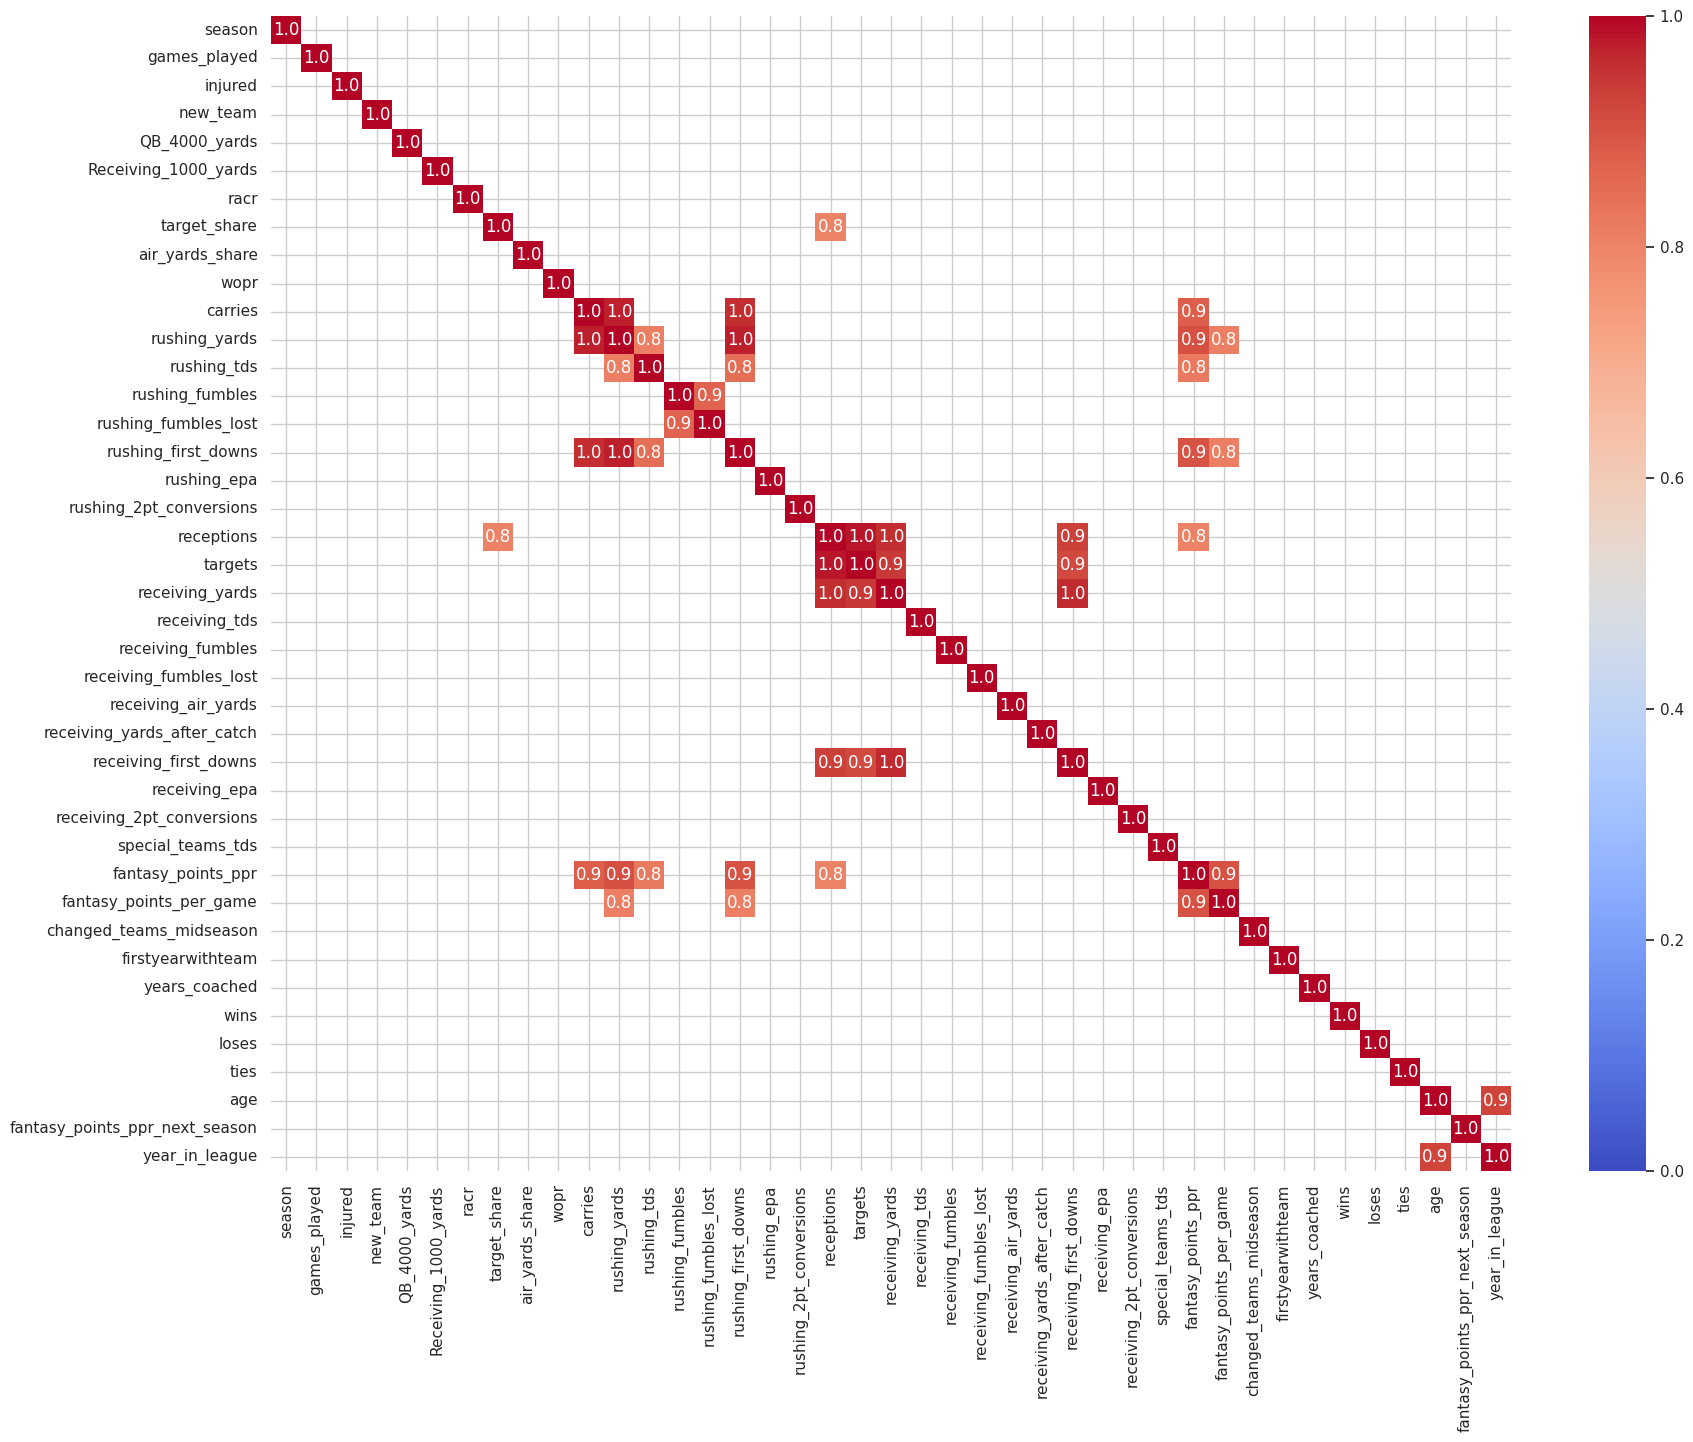

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numeric columns
numeric_cols = rb_df.select_dtypes(include=[np.number])

# Compute the correlation matrix, round it to two decimals, and filter strong correlations
corr = numeric_cols.corr()
strong_corr = corr[corr > 0.80]

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.heatmap(strong_corr, annot=True, fmt='.1f', vmin=0, cmap='coolwarm', center=0.5, ax=ax)
plt.show()


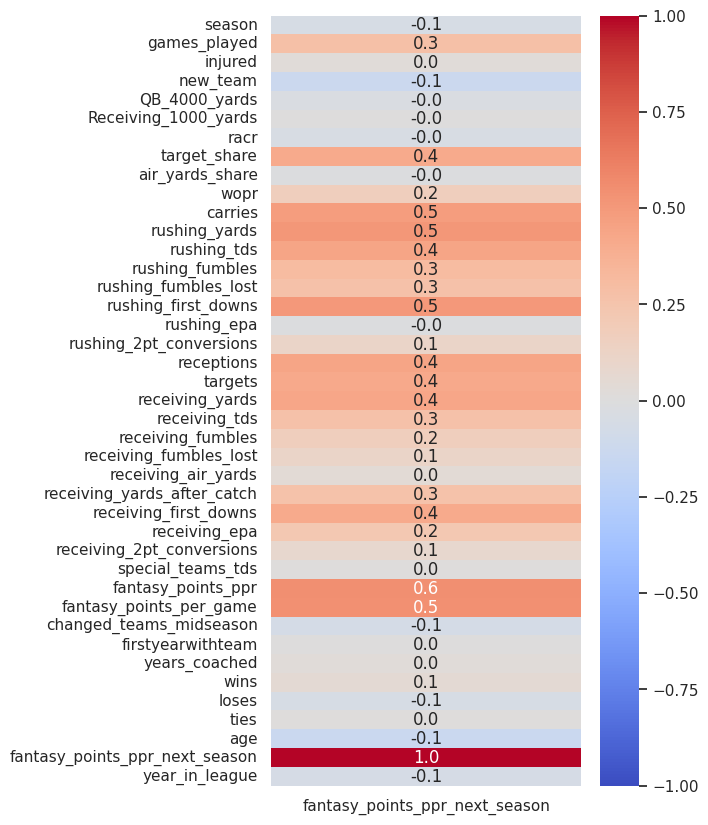

In [ ]:
numeric_cols = rb_df.select_dtypes(include=[np.number])

# Compute the correlation matrix and round it to two decimals
corr = numeric_cols.corr().round(2)

# Isolate the correlation of 'fantasy_points_ppr_next_season' with all other variables
corr_fantasy = corr[['fantasy_points_ppr_next_season']]

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(5, 10)  # Adjust the size based on the number of variables
sns.heatmap(corr_fantasy, annot=True, fmt='.1f', vmin=-1, vmax=1, cmap='coolwarm', center=0, ax=ax)
plt.show()


In [ ]:
rb_df.drop(columns=['age','loses','receiving_fumbles_lost','rushing_fumbles_lost','receiving_yards'
,'receptions','rushing_yards','rushing_tds', 'receiving_first_downs',
                    'targets','rushing_first_downs','carries'],inplace=True)

<ipython-input-749-faa0364fc933>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rb_df.drop(columns=['age','loses','receiving_fumbles_lost','rushing_fumbles_lost','receiving_yards'


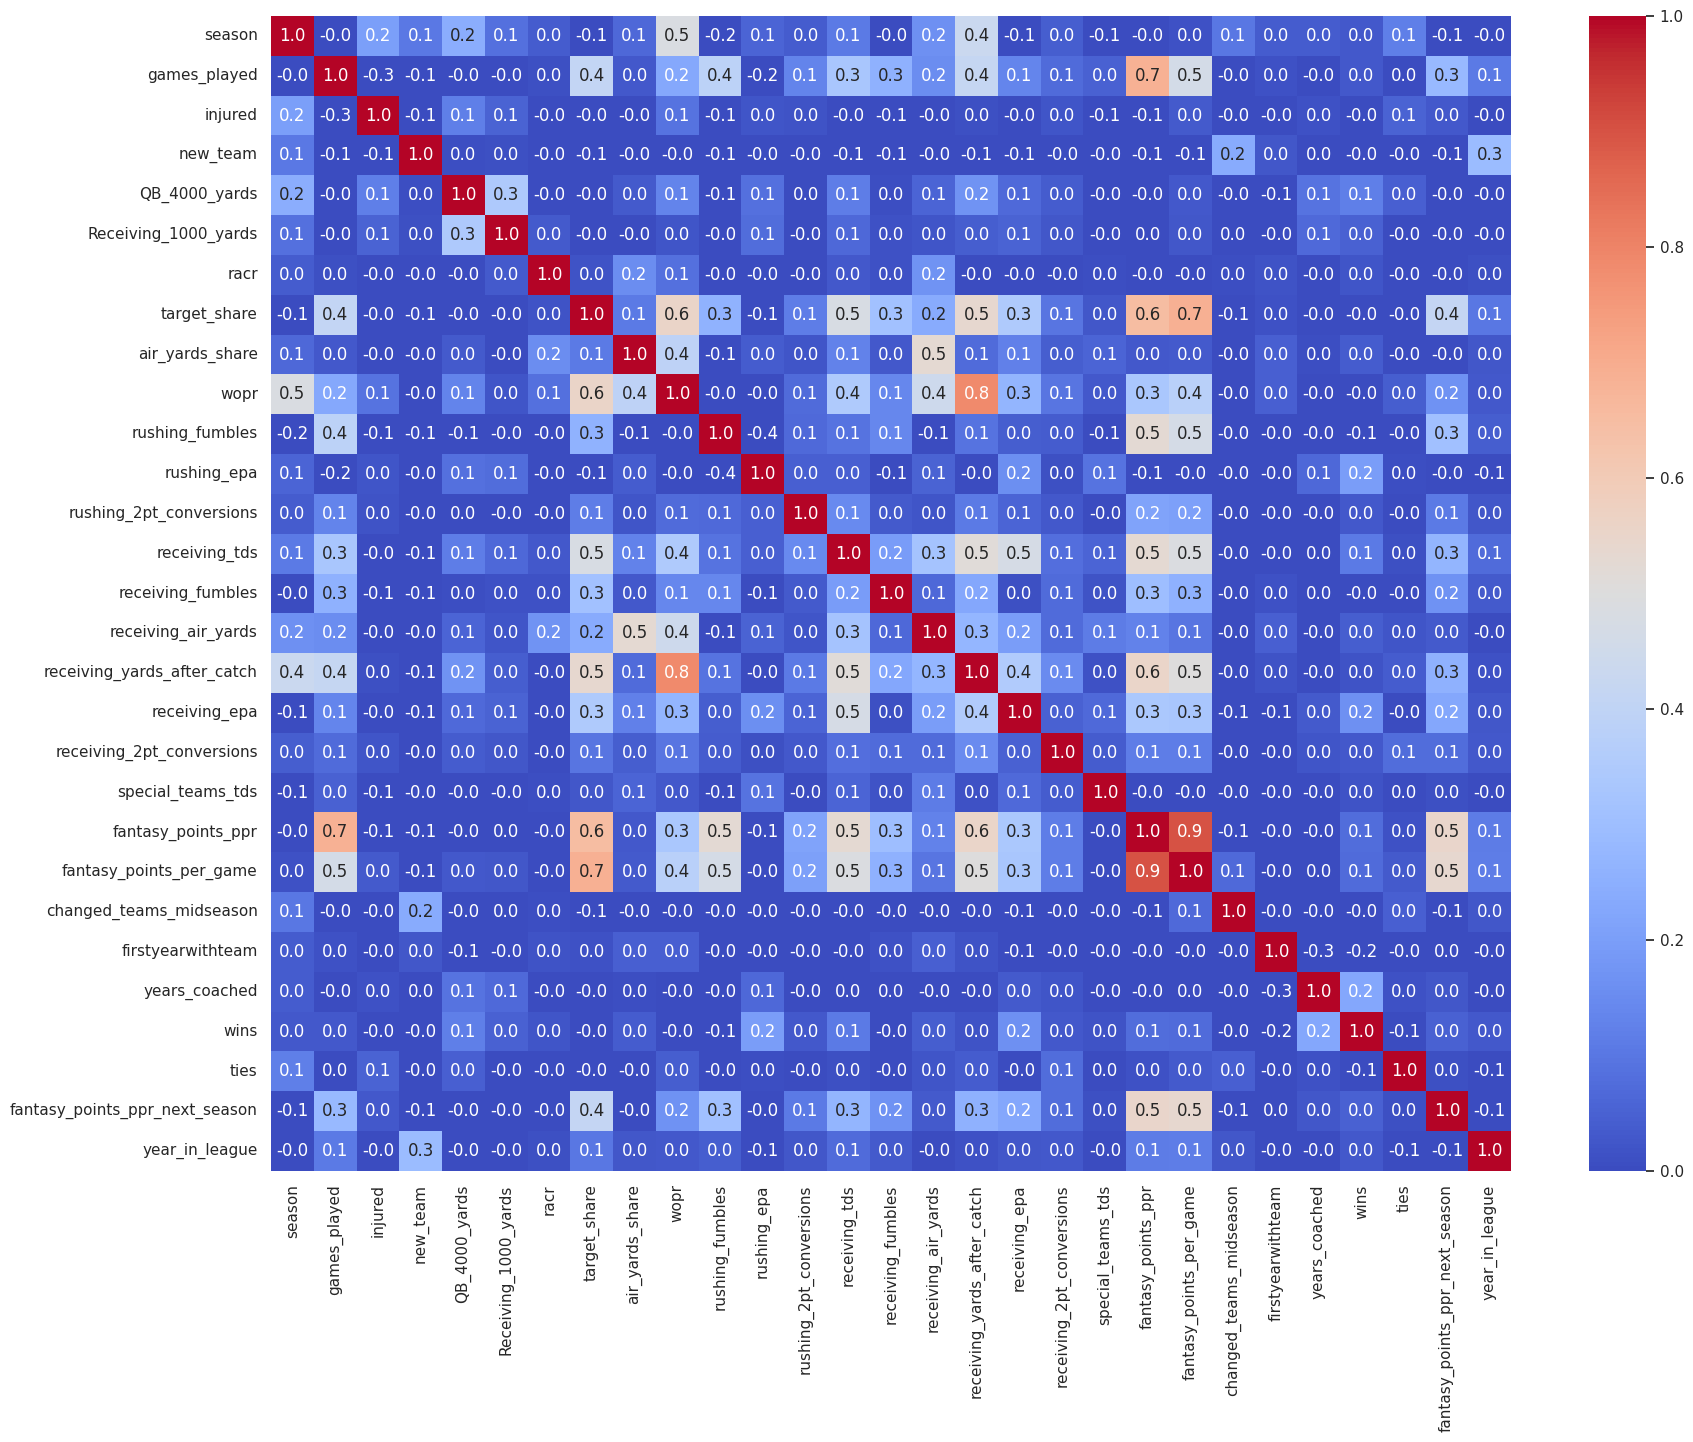

In [ ]:
numeric_cols = rb_df.select_dtypes(include=[np.number])

# Compute the correlation matrix, round it to two decimals, and filter strong correlations
corr = numeric_cols.corr()

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.heatmap(corr, annot=True, fmt='.1f', vmin=0, cmap='coolwarm', center=0.5, ax=ax)
plt.show()


In [ ]:
wr_df = df[(df['position'] == 'WR') | (df['position'] == 'TE')]
wr_df.head()

player_id        player_name position  season  games_played  injured  \
2488  00-0000145  Derrick Alexander       WR    1999            16        0   
2489  00-0000145  Derrick Alexander       WR    2000            15        0   
2490  00-0000145  Derrick Alexander       WR    2001            13        1   
7356  00-0000166  Stephen Alexander       TE    1999            15        0   
7357  00-0000166  Stephen Alexander       TE    2000            16        0   

     injury type injury severity season ending  new_team  ...  wins  loses  \
2488   no injury       no injury     no injury         0  ...   9.0    7.0   
2489   no injury       no injury     no injury         0  ...   7.0    9.0   
2490    achilles            mild            no         0  ...   5.0   11.0   
7356   no injury       no injury     no injury         0  ...  10.0    6.0   
7357   no injury       no injury     no injury         0  ...   8.0    8.0   

      ties  age  binned_weight  binned_height   binned_draft_pick  \
2488   0.0   28        180-199          72-74    Late First Round   
2489   0.0   29        180-199          72-74    Late First Round   
2490   0.0   30        180-199          72-74    Late First Round   
7356   0.0   24        240-259          75-77  Early Second Round   
7357   0.0   25        240-259          75-77  Early Second Round   

      fantasy_points_next_season  fantasy_points_ppr_next_season  \
2488                       185.0                           257.0   
2489                        66.6                            93.6   
2490                        19.4                            33.4   
7356                        62.0                           108.0   
7357                         8.5                            17.5   

      year_in_league  
2488               6  
2489               7  
2490               8  
7356               2  
7357               3  

[5 rows x 69 columns]

In [ ]:
wr_df.drop(columns=['Receiving_1000_yards','completions','attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota','fantasy_points_next_season', 'fantasy_points'],
           inplace=True)

<ipython-input-752-8062c258145e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wr_df.drop(columns=['Receiving_1000_yards','completions','attempts',


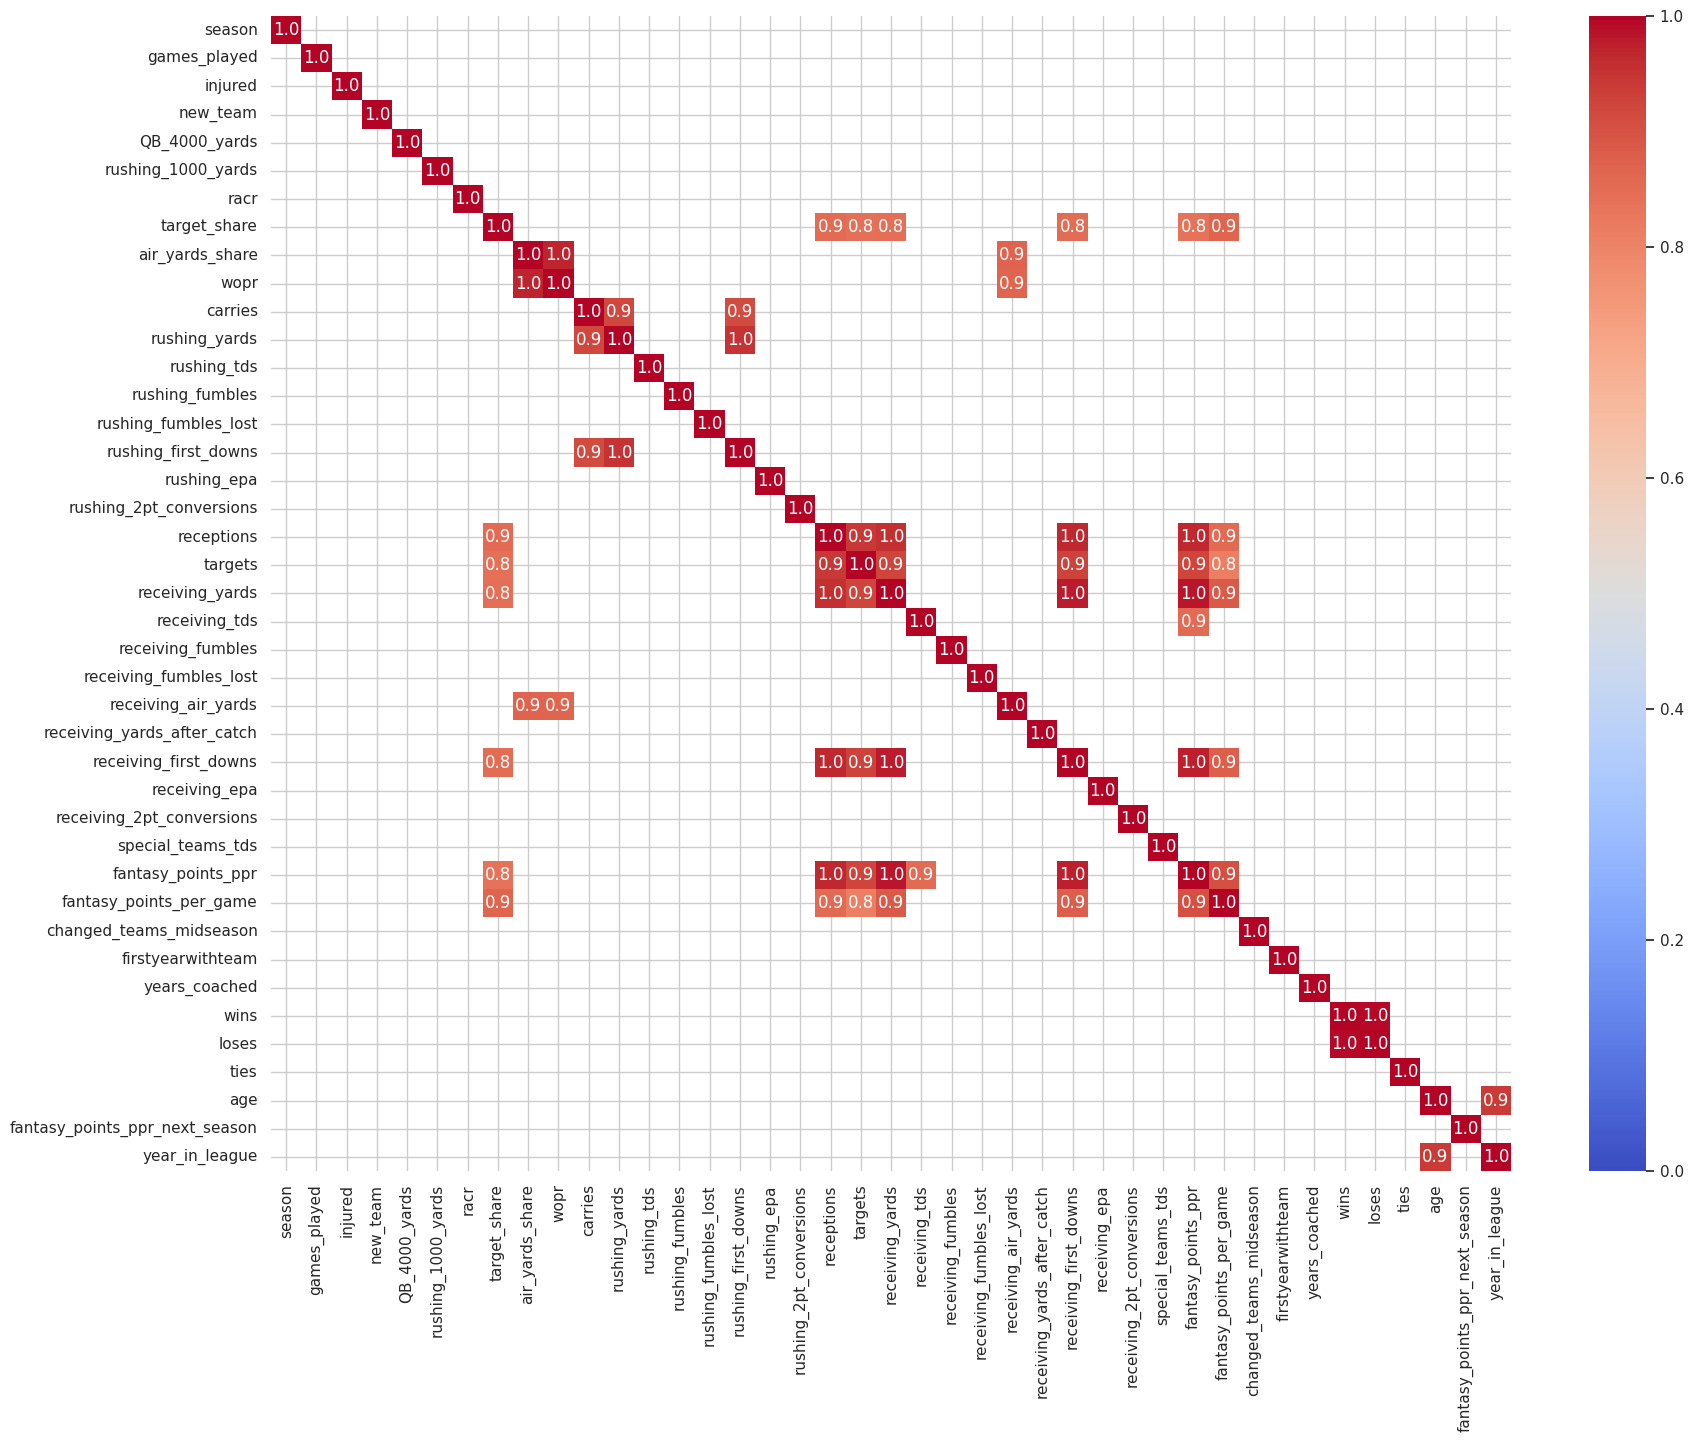

In [ ]:
# Select only numeric columns
numeric_cols = wr_df.select_dtypes(include=[np.number])

# Compute the correlation matrix, round it to two decimals, and filter strong correlations
corr = numeric_cols.corr().abs()
strong_corr = corr[corr > 0.80]

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.heatmap(strong_corr, annot=True, fmt='.1f', vmin=0, cmap='coolwarm', center=0.5, ax=ax)
plt.show()

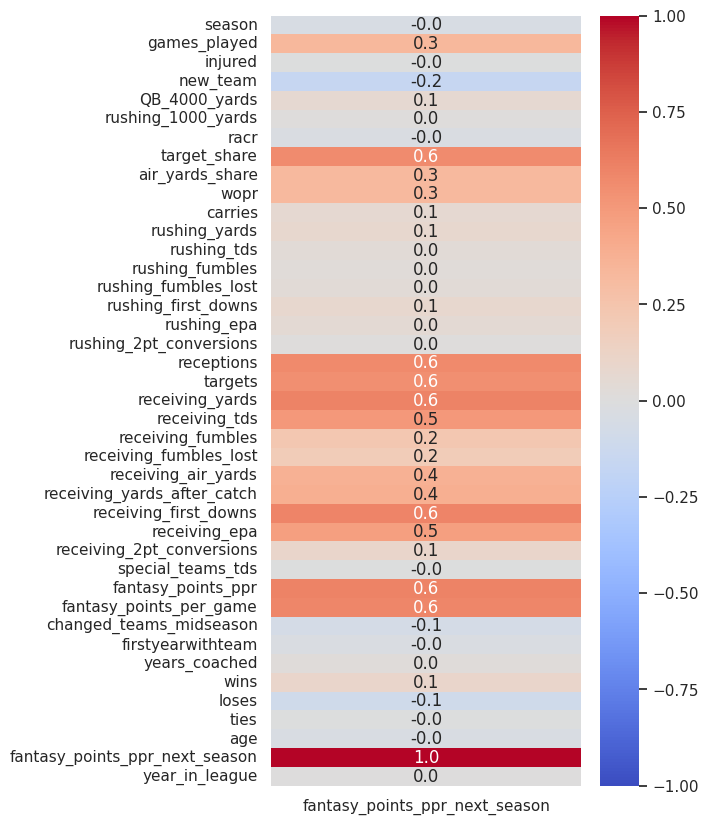

In [ ]:
numeric_cols = wr_df.select_dtypes(include=[np.number])

# Compute the correlation matrix and round it to two decimals
corr = numeric_cols.corr()

# Isolate the correlation of 'fantasy_points_ppr_next_season' with all other variables
corr_fantasy = corr[['fantasy_points_ppr_next_season']]

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(5, 10)  # Adjust the size based on the number of variables
sns.heatmap(corr_fantasy, annot=True, fmt='.1f', vmin=-1, vmax=1, cmap='coolwarm', center=0, ax=ax)
plt.show()

In [ ]:
wr_df.drop(columns=['age','loses','receiving_fumbles_lost','rushing_fumbles_lost','receiving_yards'
,'receptions','receiving_first_downs','target_share','targets','receiving_tds','receiving_air_yards',
                    'wopr','rushing_first_downs','carries',],inplace=True)

<ipython-input-755-688d02ee2a5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wr_df.drop(columns=['age','loses','receiving_fumbles_lost','rushing_fumbles_lost','receiving_yards'


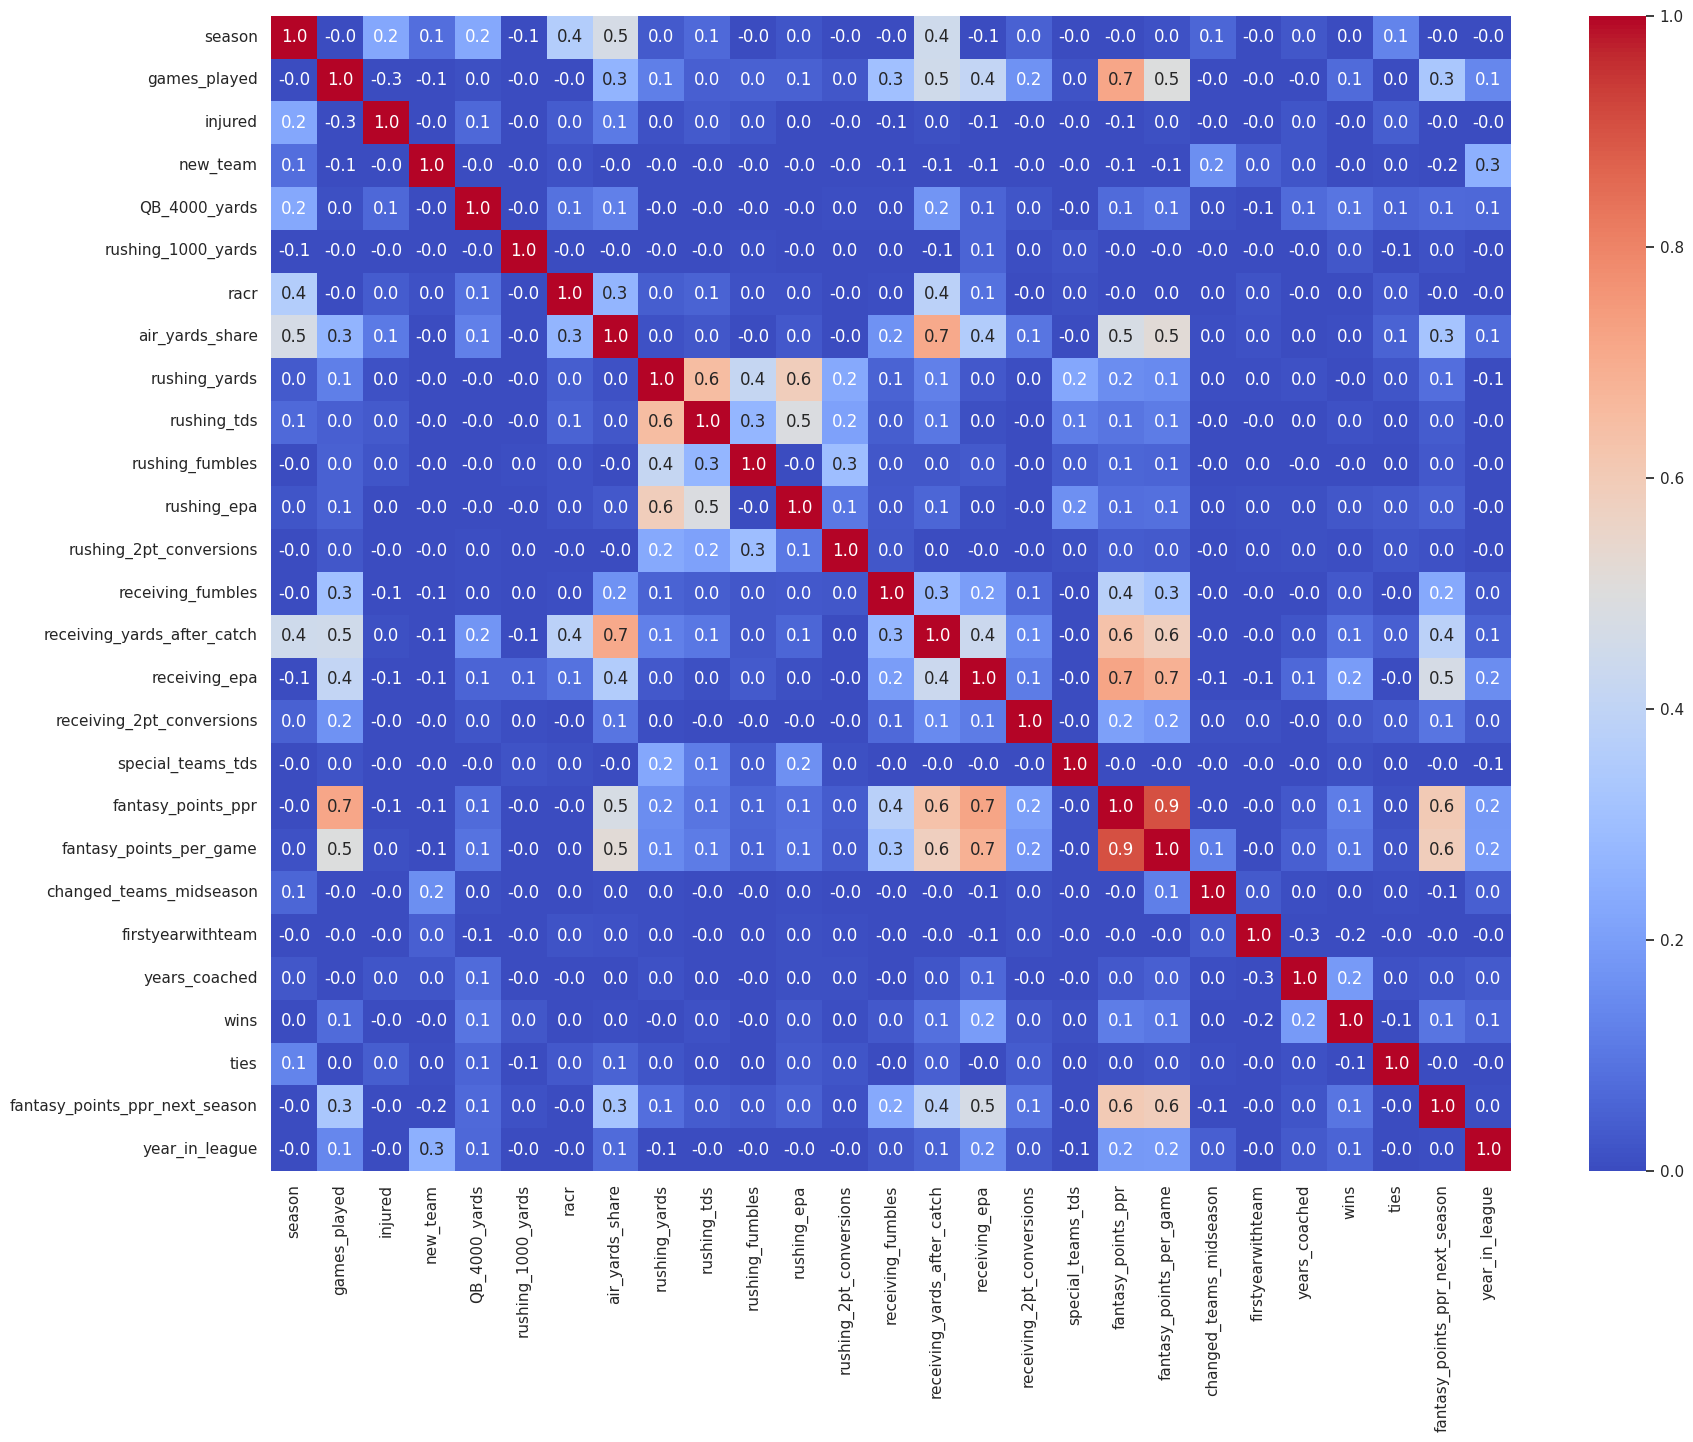

In [ ]:
numeric_cols = wr_df.select_dtypes(include=[np.number])

# Compute the correlation matrix, round it to two decimals, and filter strong correlations
corr = numeric_cols.corr()

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.heatmap(corr, annot=True, fmt='.1f', vmin=0, cmap='coolwarm', center=0.5, ax=ax)
plt.show()

In [ ]:
qb_df = df[(df['position'] == 'QB')]
qb_df.head()

player_id  player_name position  season  games_played  injured  \
8020  00-0000104  Troy Aikman       QB    1999            14        1   
7817  00-0000722   Tony Banks       QB    1999            11        0   
7818  00-0000722   Tony Banks       QB    2000            11        0   
7819  00-0000722   Tony Banks       QB    2001            15        0   
7820  00-0000722   Tony Banks       QB    2003             6        0   

     injury type injury severity season ending  new_team  ...      wins  \
8020  concussion           minor            no         0  ...  8.000000   
7817   no injury       no injury     no injury         0  ...  8.000000   
7818   no injury       no injury     no injury         0  ...  8.000000   
7819   no injury       no injury     no injury         1  ...  8.027245   
7820   no injury       no injury     no injury         1  ...  5.000000   

          loses      ties  age  binned_weight  binned_height  \
8020   8.000000  0.000000   33        200-219          75-77   
7817   8.000000  0.000000   26        220-239          75-77   
7818   8.000000  0.000000   27        220-239          75-77   
7819   8.055426  0.036366   28        220-239          75-77   
7820  11.000000  0.000000   30        220-239          75-77   

       binned_draft_pick  fantasy_points_next_season  \
8020               Top 5                       63.94   
7817  Early Second Round                       85.22   
7818  Early Second Round                      136.64   
7819  Early Second Round                       44.42   
7820  Early Second Round                        0.64   

      fantasy_points_ppr_next_season  year_in_league  
8020                           63.94              11  
7817                           85.22               4  
7818                          136.64               5  
7819                           44.42               6  
7820                            0.64               8  

[5 rows x 69 columns]

In [ ]:
df.columns

Index(['player_id', 'player_name', 'position', 'season', 'games_played',
       'injured', 'injury type', 'injury severity', 'season ending',
       'new_team', 'QB_4000_yards', 'Receiving_1000_yards',
       'rushing_1000_yards', 'racr', 'target_share', 'air_yards_share', 'wopr',
       'completions', 'attempts', 'passing_yards', 'passing_tds',
       'interceptions', 'sacks', 'sack_yards', 'sack_fumbles',
       'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch',
       'passing_first_downs', 'passing_epa', 'passing_2pt_conversions', 'pacr',
       'dakota', 'carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles',
       'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa',
       'rushing_2pt_conversions', 'receptions', 'targets', 'receiving_yards',
       'receiving_tds', 'receiving_fumbles', 'receiving_fumbles_lost',
       'receiving_air_yards', 'receiving_yards_after_catch',
       'receiving_first_downs', 'receiving_epa', 'receiving_2pt_conversio

In [ ]:
qb_df.drop(columns=['receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'special_teams_tds', 'fantasy_points',
        'QB_4000_yards', 'racr', 'target_share', 'air_yards_share', 'wopr',
                    'fantasy_points_next_season'],inplace=True)

<ipython-input-759-d63b12991d86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qb_df.drop(columns=['receptions', 'targets', 'receiving_yards', 'receiving_tds',


In [ ]:
starting_data = pd.read_excel('QBstarterbackup.xlsx')
qb_df = qb_df.merge(starting_data, how = 'inner', on = ['player_id', 'season'] )

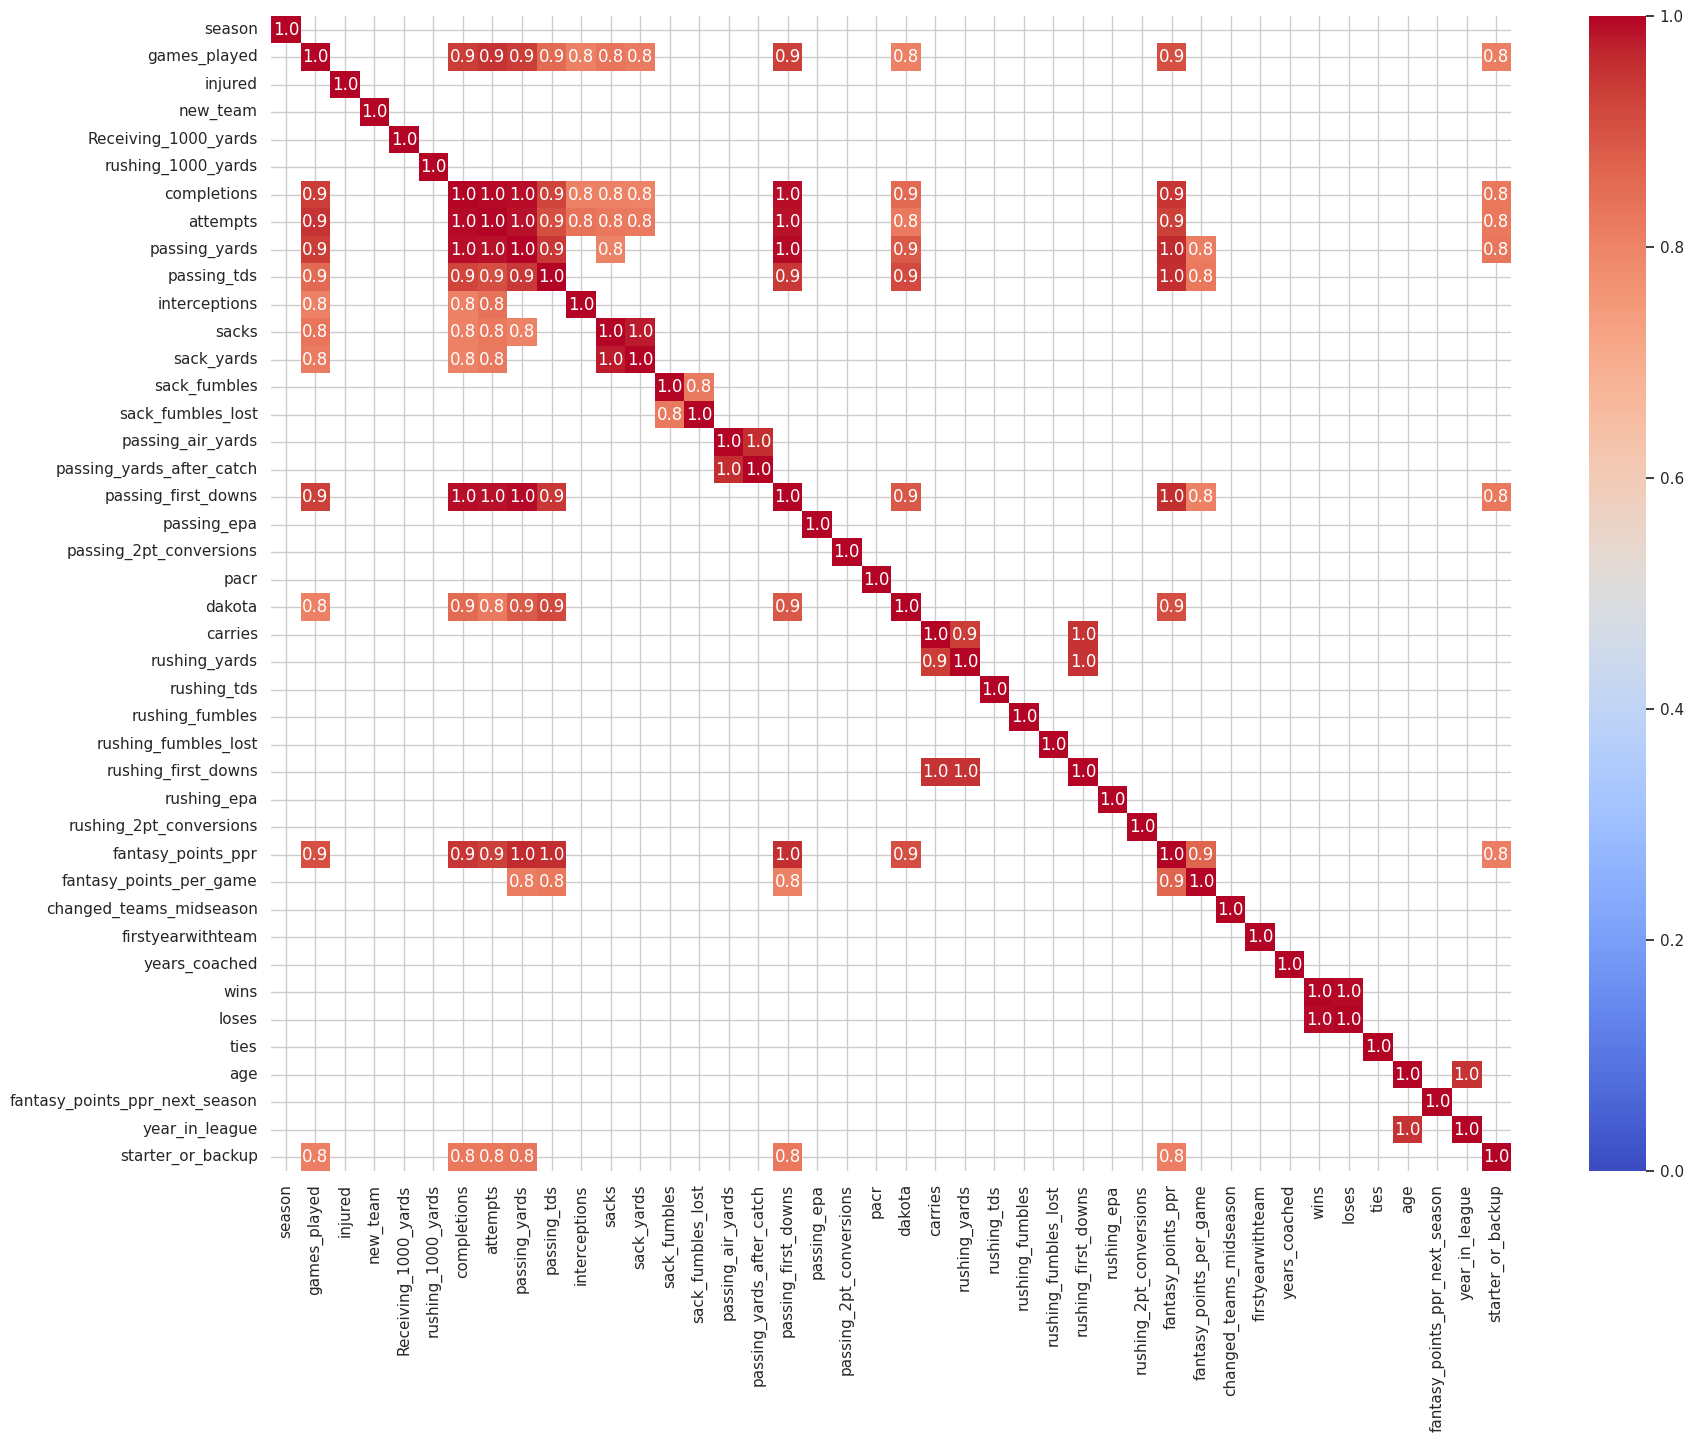

In [ ]:
# Select only numeric columns
numeric_cols = qb_df.select_dtypes(include=[np.number])

# Compute the correlation matrix, round it to two decimals, and filter strong correlations
corr = numeric_cols.corr().abs()
strong_corr = corr[corr > 0.80]

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.heatmap(strong_corr, annot=True, fmt='.1f', vmin=0, cmap='coolwarm', center=0.5, ax=ax)
plt.show()

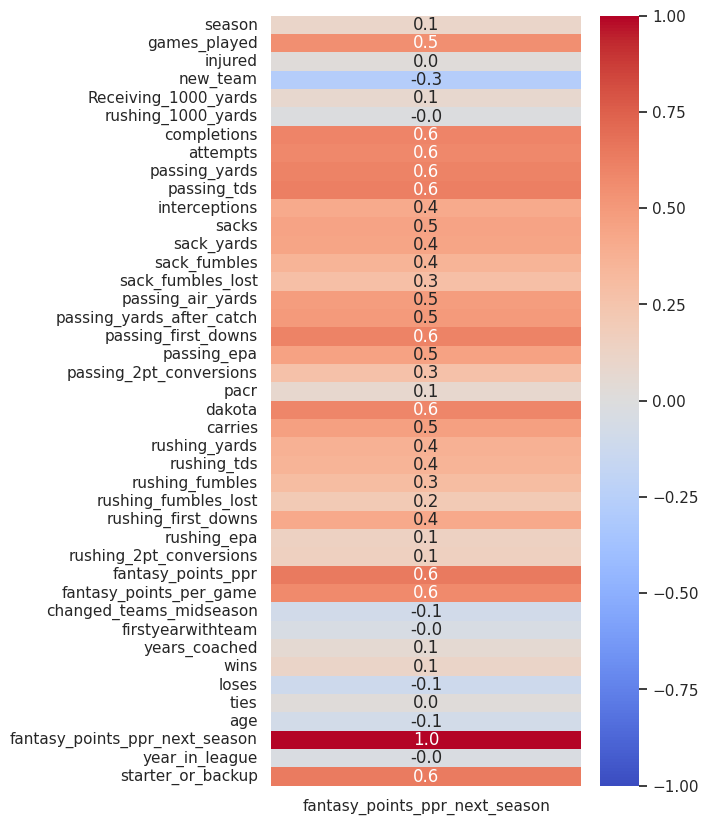

In [ ]:
numeric_cols = qb_df.select_dtypes(include=[np.number])

# Compute the correlation matrix and round it to two decimals
corr = numeric_cols.corr()

# Isolate the correlation of 'fantasy_points_ppr_next_season' with all other variables
corr_fantasy = corr[['fantasy_points_ppr_next_season']]

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(5, 10)  # Adjust the size based on the number of variables
sns.heatmap(corr_fantasy, annot=True, fmt='.1f', vmin=-1, vmax=1, cmap='coolwarm', center=0, ax=ax)
plt.show()

In [ ]:
qb_df.drop(columns=['completions', 'attempts','passing_yards', 'passing_tds',
                    'passing_first_downs','dakota','loses','age','passing_air_yards','sack_yards',
                    'carries','rushing_first_downs','sack_fumbles_lost'],inplace=True)

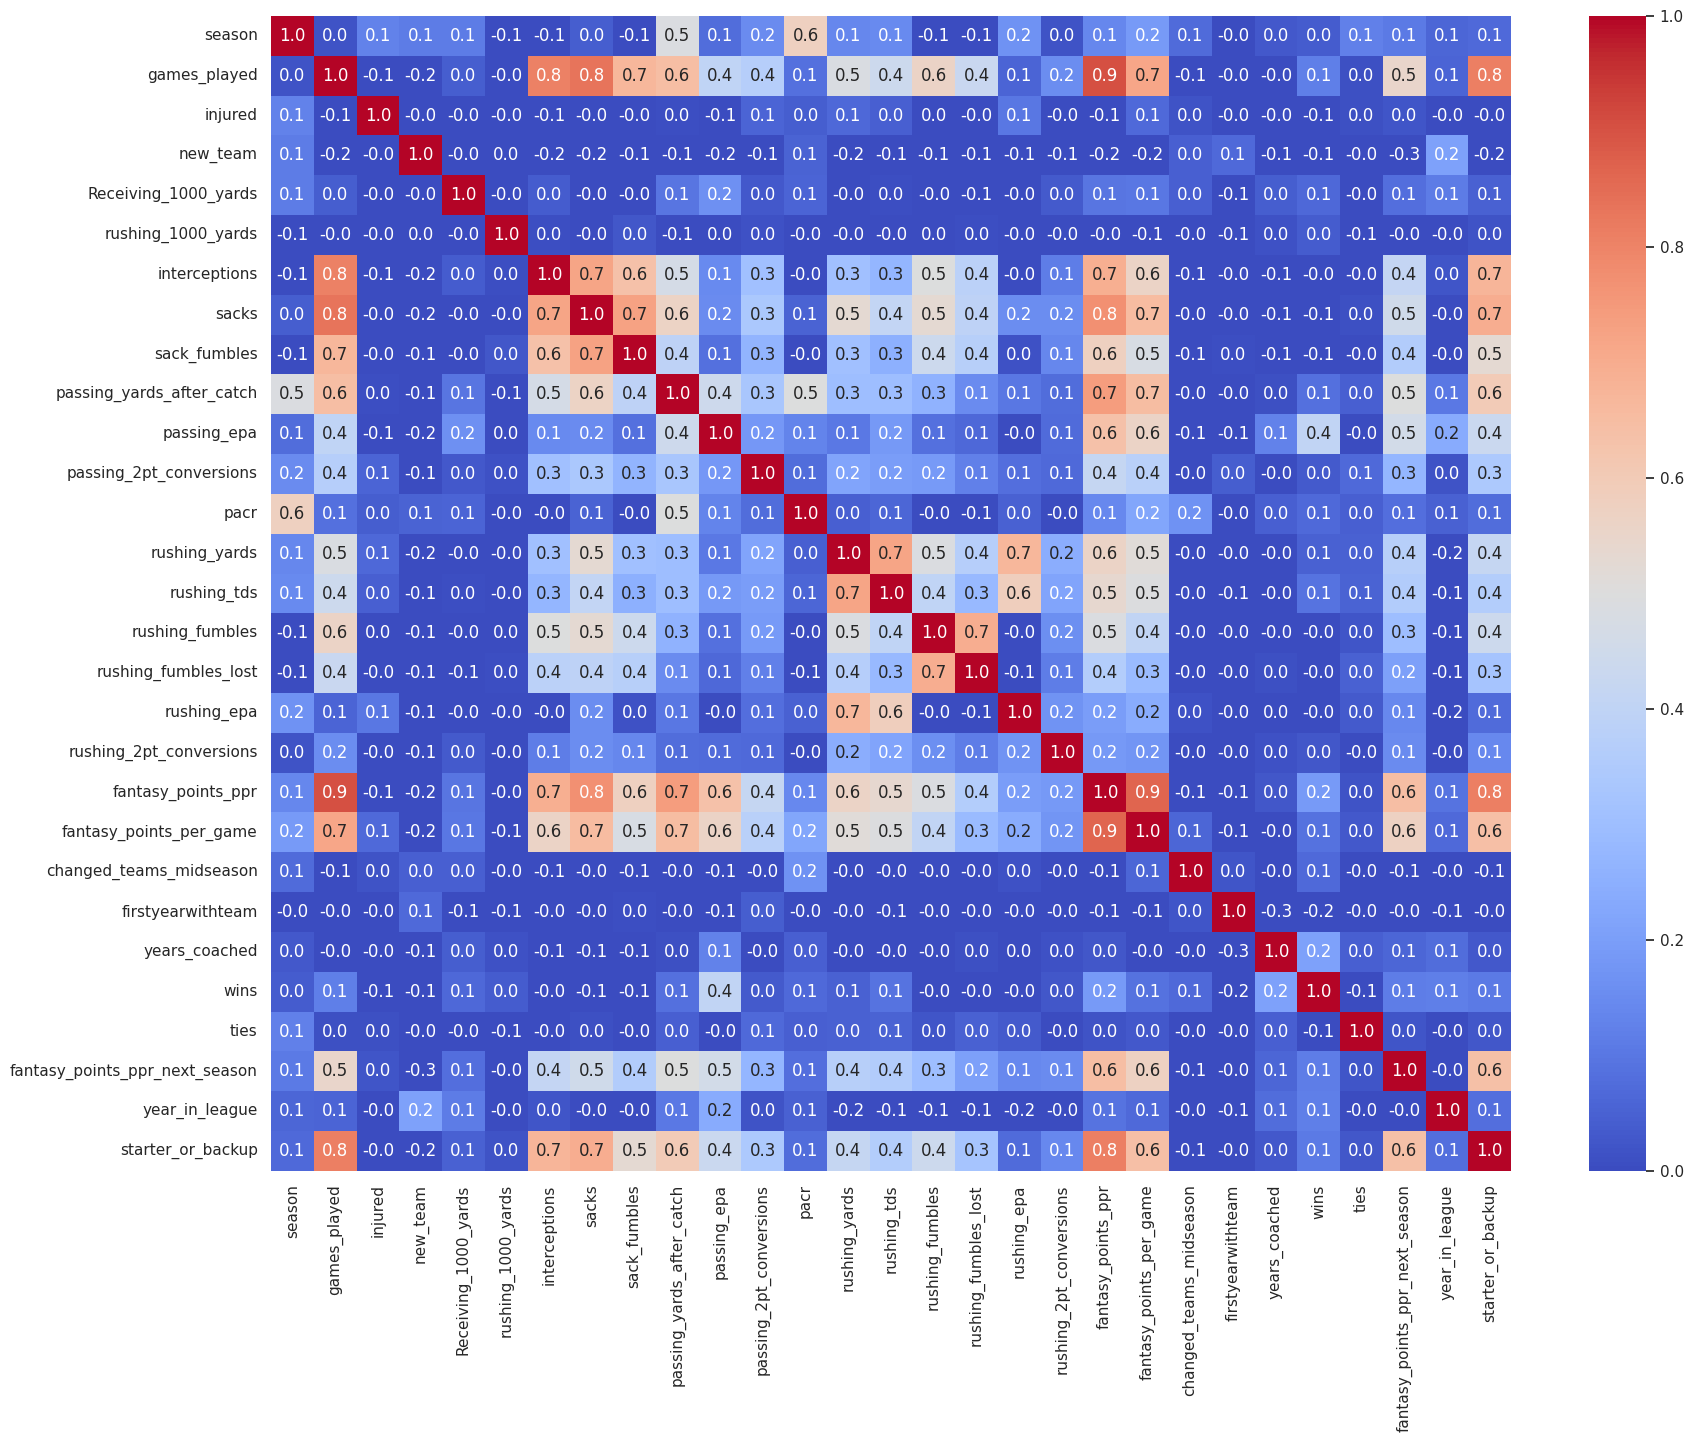

In [ ]:
numeric_cols = qb_df.select_dtypes(include=[np.number])

# Compute the correlation matrix, round it to two decimals, and filter strong correlations
corr = numeric_cols.corr()

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.heatmap(corr, annot=True, fmt='.1f', vmin=0, cmap='coolwarm', center=0.5, ax=ax)
plt.show()

<ipython-input-765-1cbbf540adb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['avg_fantasy_points'] = temp_df.groupby('player_id')['fantasy_points_ppr'].transform('mean')


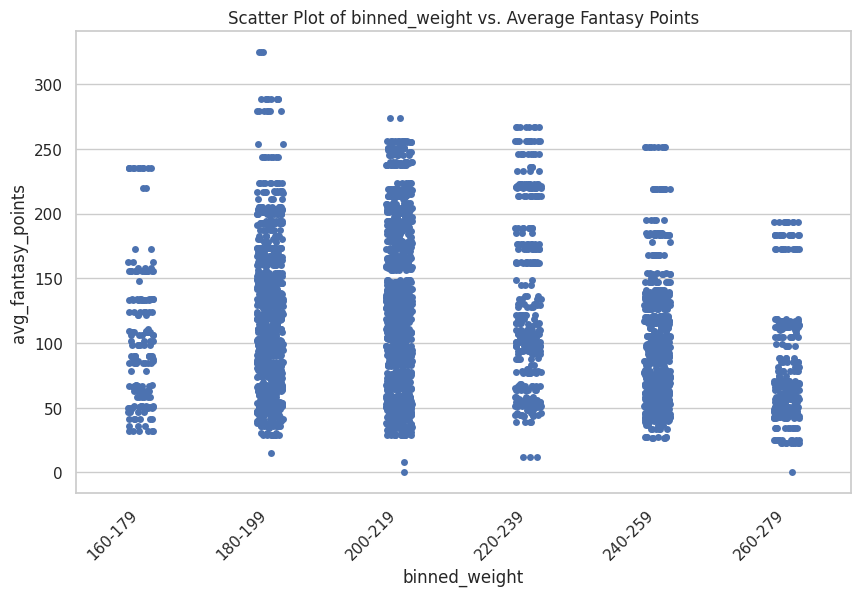

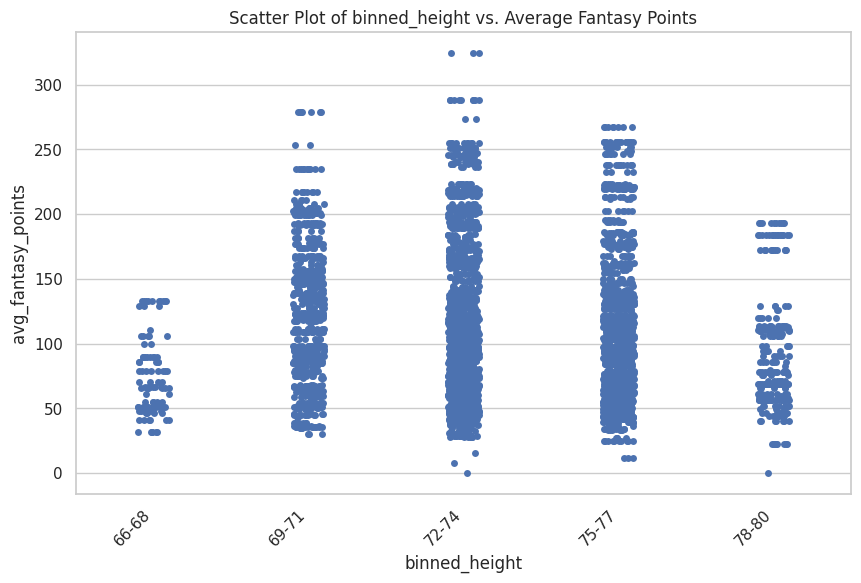

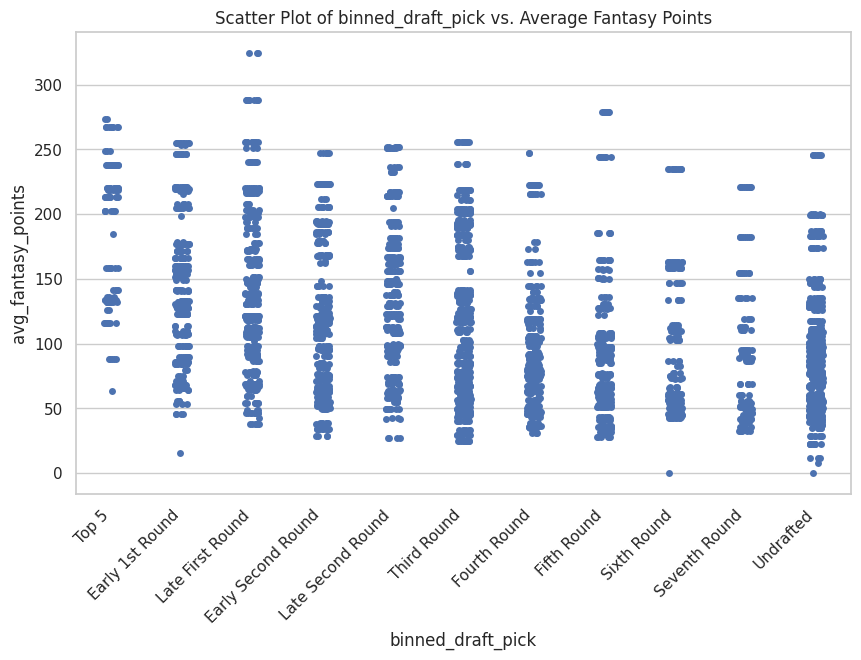

In [ ]:
temp_df = wr_df
temp_df['avg_fantasy_points'] = temp_df.groupby('player_id')['fantasy_points_ppr'].transform('mean')

non_numeric_cols=df[['binned_weight','binned_height','binned_draft_pick']]
# Plot each non-numeric column against 'fantasy_points_ppr_next_season'
for column in non_numeric_cols.columns:
    plt.figure(figsize=(10, 6))
    # Use seaborn to create a scatter plot. As seaborn scatter plot does not directly support non-numeric data,
    # we use a category plot or strip plot here.
    sns.stripplot(x=column, y='avg_fantasy_points', data=temp_df)

    # Providing a title for each plot
    plt.title(f'Scatter Plot of {column} vs. Average Fantasy Points')

    # Improve plot readability by rotating x labels if they are too long or numerous
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.show()

<ipython-input-766-b0421a6c1b34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['avg_fantasy_points'] = temp_df.groupby('player_id')['fantasy_points_ppr'].transform('mean')


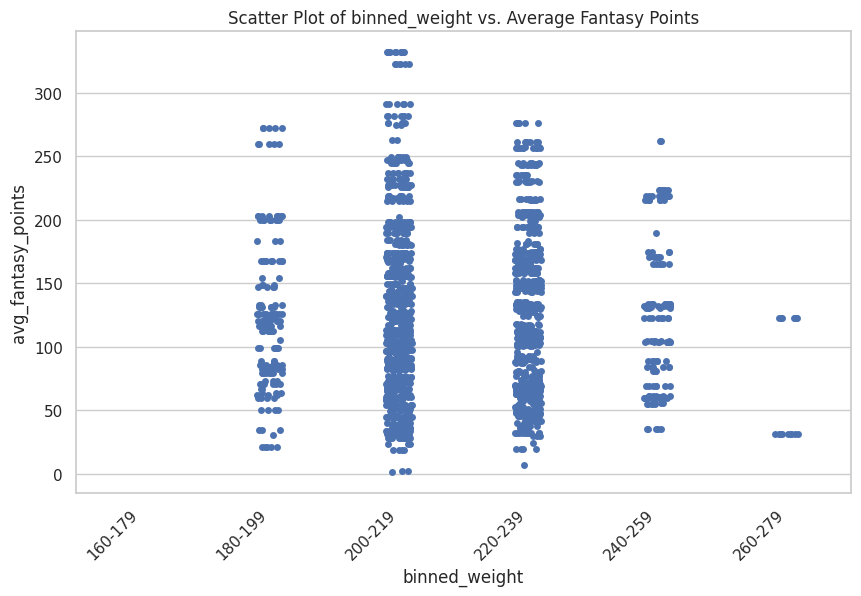

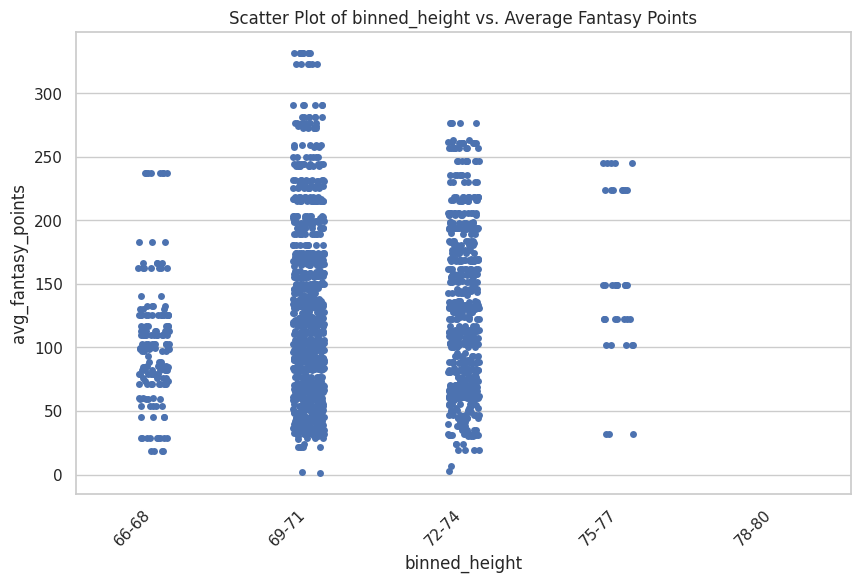

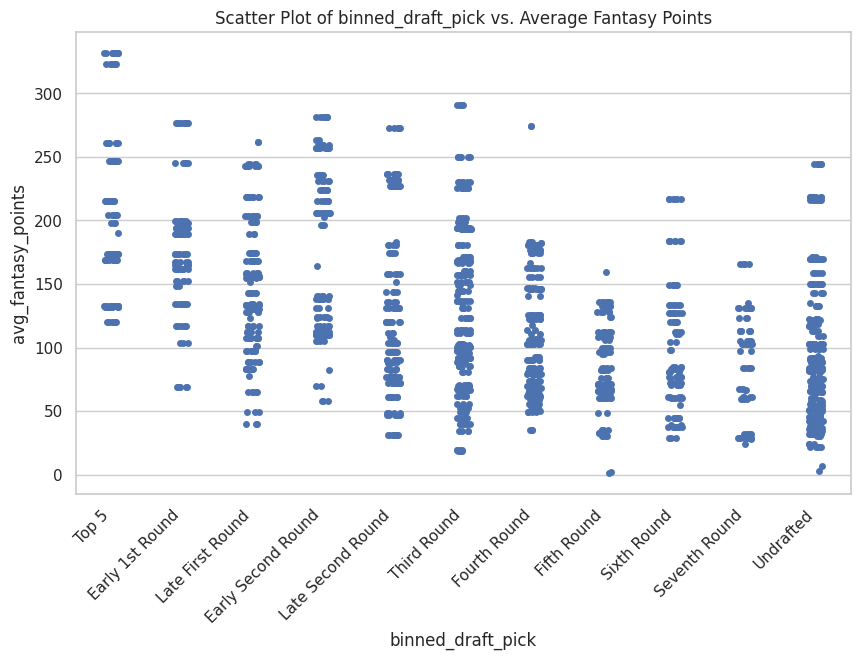

In [ ]:
temp_df = rb_df
temp_df['avg_fantasy_points'] = temp_df.groupby('player_id')['fantasy_points_ppr'].transform('mean')

non_numeric_cols=df[['binned_weight','binned_height','binned_draft_pick']]
# Plot each non-numeric column against 'fantasy_points_ppr_next_season'
for column in non_numeric_cols.columns:
    plt.figure(figsize=(10, 6))
    # Use seaborn to create a scatter plot. As seaborn scatter plot does not directly support non-numeric data,
    # we use a category plot or strip plot here.
    sns.stripplot(x=column, y='avg_fantasy_points', data=temp_df)

    # Providing a title for each plot
    plt.title(f'Scatter Plot of {column} vs. Average Fantasy Points')

    # Improve plot readability by rotating x labels if they are too long or numerous
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.show()

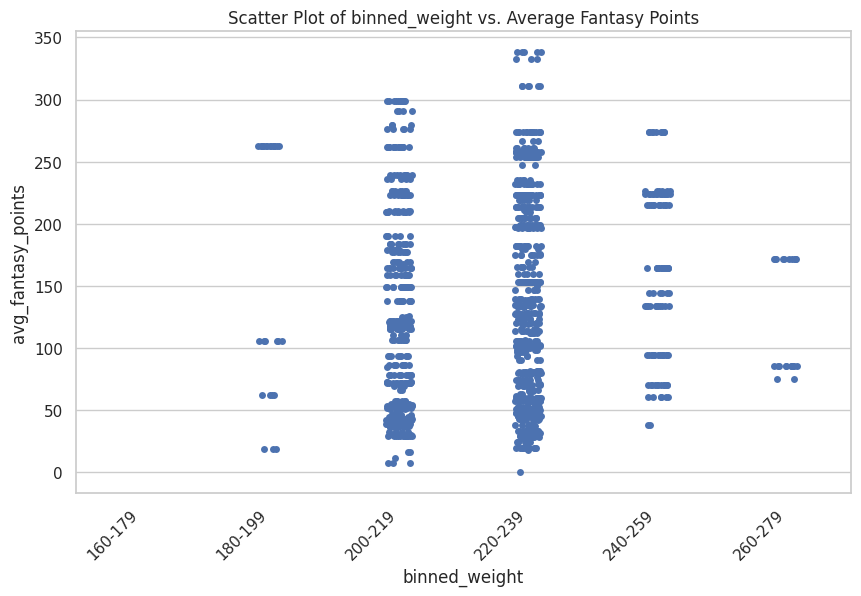

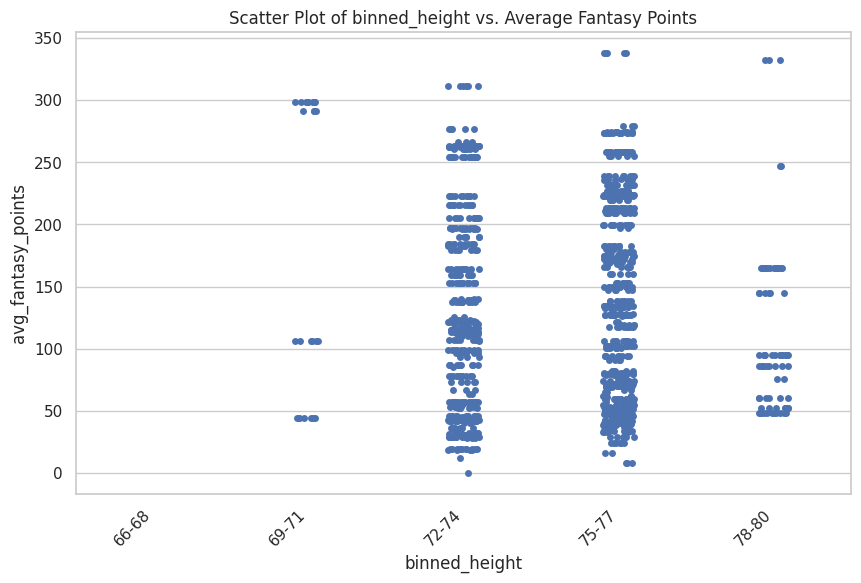

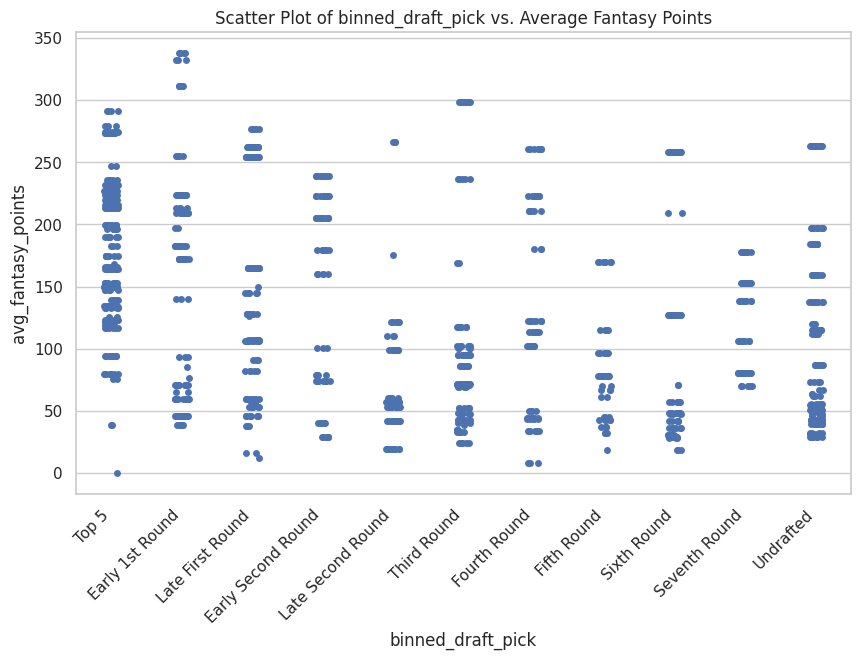

In [ ]:
temp_df = qb_df
temp_df['avg_fantasy_points'] = temp_df.groupby('player_id')['fantasy_points_ppr'].transform('mean')

non_numeric_cols=df[['binned_weight','binned_height','binned_draft_pick']]
# Plot each non-numeric column against 'fantasy_points_ppr_next_season'
for column in non_numeric_cols.columns:
    plt.figure(figsize=(10, 6))
    # Use seaborn to create a scatter plot. As seaborn scatter plot does not directly support non-numeric data,
    # we use a category plot or strip plot here.
    sns.stripplot(x=column, y='avg_fantasy_points', data=temp_df)

    # Providing a title for each plot
    plt.title(f'Scatter Plot of {column} vs. Average Fantasy Points')

    # Improve plot readability by rotating x labels if they are too long or numerous
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.show()

In [ ]:
wr_df.groupby('binned_draft_pick')['fantasy_points_ppr'].agg(['mean','median','max'])

mean  median    max
binned_draft_pick                            
Top 5               190.130991  191.40  359.2
Early 1st Round     143.230973  144.20  369.1
Late First Round    138.337039  126.50  385.3
Early Second Round  120.784976  112.85  374.6
Late Second Round   134.008391  120.40  358.4
Third Round         115.992236  101.65  439.5
Fourth Round         94.131405   81.50  339.2
Fifth Round          90.693028   79.00  341.2
Sixth Round          96.950049   84.50  390.9
Seventh Round        94.394074   78.50  282.2
Undrafted            88.575658   78.90  335.9

In [ ]:
wr_injury = wr_df.groupby(['injury severity','injury type'])['fantasy_points_ppr_next_season'].agg(['mean','median','std','count'])
wr_injury[wr_injury['count'] > 20].sort_values(by=['injury severity','median'])

mean  median         std  count
injury severity injury type                                       
mild            concussion    99.320606   76.00   86.344863     33
                knee          88.472549   76.50   65.543384     51
                hamstring    119.565714  103.30   91.712393     35
                ankle        114.975942  104.90   77.468448     69
                shoulder     123.248000  118.20   79.731587     25
                leg          133.218261  126.60   93.369554     23
minor           hamstring    113.937826  104.27   72.745094     46
                leg          132.496296  127.00  101.010637     27
                ankle        148.854444  154.80   82.031472     36
                knee         165.669444  164.25   83.688111     36
moderate        foot         103.969565   80.10   81.491374     23
                knee          99.436000   86.30   75.999612     40
                ankle         96.188235   91.50   61.685202     34
                hamstring    133.531176  114.50   91.943418     34
no injury       no injury    110.395876   97.30   81.197962   2881
severe          foot          65.629630   53.20   78.604212     27
                knee          90.405098   64.50   76.641526     51
                ankle         93.275652   78.90   76.126106     23
                leg           93.968182   80.30   78.028001     22
                acl           92.090000   90.55   64.874217     40

In [ ]:
rb_injury = rb_df.groupby(['injury severity','injury type'])['fantasy_points_ppr_next_season'].agg(['mean','median','std','count'])
rb_injury[rb_injury['count'] > 15].sort_values(by=['injury severity','median'])

mean  median         std  count
injury severity injury type                                       
mild            hamstring    107.500000   96.20   78.654093     20
                leg          115.878824   98.34   93.988126     17
                knee         125.597436  122.70   91.360165     39
                ankle        164.437059  174.80   90.678667     34
minor           leg          140.613000  127.70  114.030072     20
                ankle        137.688000  142.20  102.438454     25
moderate        knee          91.376923   67.10   68.739725     26
                ankle        110.640952  104.10   97.535089     21
no injury       no injury    113.776617   93.95   92.064579   1330
severe          acl          103.423077   68.95   95.881975     26
                knee         103.564211   84.50   79.830496     38

In [ ]:
qb_injury = rb_df.groupby(['injury severity','injury type'])['fantasy_points_ppr_next_season'].agg(['mean','median','std','count'])
qb_injury[rb_injury['count'] > 5].sort_values(by=['injury severity','median'])

mean  median         std  count
injury severity injury type                                       
mild            ribs          61.583333   40.25   72.058793      6
                toe          129.746667   79.95  110.685144      6
                foot         120.111111   94.90  100.077675      9
                hamstring    107.500000   96.20   78.654093     20
                mcl          118.685714   98.30   77.027818      7
                leg          115.878824   98.34   93.988126     17
                shoulder     115.120000  116.85   85.047958     10
                knee         125.597436  122.70   91.360165     39
                concussion   138.960000  125.15   80.747799     10
                ankle        164.437059  174.80   90.678667     34
                groin        153.028571  199.40  118.371333      7
minor           knee         116.285714   76.55  106.256539     14
                groin        124.900000   77.70   89.909658      7
                toe          115.442857  112.70   78.461814      7
                leg          140.613000  127.70  114.030072     20
                foot         110.614286  129.40   61.173672      7
                hamstring    167.434000  133.22  102.665431     10
                concussion   143.690909  140.10   96.301157     11
                ankle        137.688000  142.20  102.438454     25
                shoulder     179.583333  184.60   92.115393      6
moderate        knee          91.376923   67.10   68.739725     26
                mcl           92.600000   73.50   78.408716      7
                leg           86.346154   81.30   77.619989     13
                ankle        110.640952  104.10   97.535089     21
                hamstring    107.728571  112.40  118.244432      7
                foot         145.450000  151.50   62.570669      8
no injury       no injury    113.776617   93.95   92.064579   1330
severe          leg           75.813333   50.90   74.216449     15
                achilles      78.900000   53.95   76.263045      6
                ankle         71.841667   64.70   63.083631     12
                acl          103.423077   68.95   95.881975     26
                knee         103.564211   84.50   79.830496     38
                shoulder     113.667500  113.20   90.197076      8
                foot         181.145714  208.00  101.567778      7

In [ ]:
conditions = (rb_df['injury severity'].isin(['minor', 'mild']))

# Replace 'injury_severity' under specified conditions
rb_df.loc[conditions, 'injury severity'] = 'no injury'

# Replace 'injury_type' and 'season_ending' under specified conditions
rb_df.loc[conditions, ['injury type', 'season ending']] = 'no injury'

# Update 'injured' column under specified conditions
rb_df.loc[conditions, 'injured'] = 1

In [ ]:
conditions = (qb_df['injury severity'].isin(['minor', 'mild']))

# Replace 'injury_severity' under specified conditions
qb_df.loc[conditions, 'injury severity'] = 'no injury'

# Replace 'injury_type' and 'season_ending' under specified conditions
qb_df.loc[conditions, ['injury type', 'season ending']] = 'no injury'

# Update 'injured' column under specified conditions
qb_df.loc[conditions, 'injured'] = 1

In [ ]:
conditions = (wr_df['injury severity'].isin(['minor', 'mild']))

# Replace 'injury_severity' under specified conditions
wr_df.loc[conditions, 'injury severity'] = 'no injury'

# Replace 'injury_type' and 'season_ending' under specified conditions
wr_df.loc[conditions, ['injury type', 'season ending']] = 'no injury'

# Update 'injured' column under specified conditions
wr_df.loc[conditions, 'injured'] = 1

In [ ]:
wr_df['injury severity'].unique()

array(['no injury', 'severe', 'moderate', 'suspension'], dtype=object)

# Modeling - This section involves our machine learning models and results. This contributes to requirements 8 and 9

## Quaterback Analysis

### Regression

In [ ]:
import numpy as np
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from  sklearn.linear_model  import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statistics as stat
import math
import sklearn.metrics


In [ ]:
#function to test for correlation between the independent variables
def multiocollinearity(x):
  vif_data = pd.DataFrame()
  vif_data["feature"] = x.columns
  vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

  for index, row in vif_data.iterrows():
      print(row)
  return vif_data

In [ ]:
qb_df.columns

Index(['player_id', 'player_name', 'position', 'season', 'games_played',
       'injured', 'injury type', 'injury severity', 'season ending',
       'new_team', 'Receiving_1000_yards', 'rushing_1000_yards',
       'interceptions', 'sacks', 'sack_fumbles', 'passing_yards_after_catch',
       'passing_epa', 'passing_2pt_conversions', 'pacr', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost', 'rushing_epa',
       'rushing_2pt_conversions', 'fantasy_points_ppr',
       'fantasy_points_per_game', 'changed_teams_midseason',
       'firstyearwithteam', 'years_coached', 'wins', 'ties', 'binned_weight',
       'binned_height', 'binned_draft_pick', 'fantasy_points_ppr_next_season',
       'year_in_league', 'starter_or_backup', 'avg_fantasy_points'],
      dtype='object')

In [ ]:
qb_df.dropna(axis = 0, inplace=True)

In [ ]:
#function to check for correlation
def prediction_scatterplot(actual, pred):
  plt.figure(figsize=(8, 6))
  plt.scatter(actual, pred, color='blue')
  plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=2)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('Actual vs. Predicted')
  plt.show()


In [ ]:
#function to get the model
def linear_reg(x_train, x_test, y_train, y_test, test_ids_names=None):
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    x_train2 = sm.add_constant(x_train)
    reg = sm.OLS(y_train, x_train2)
    reg1 = reg.fit()
    print(reg1.summary())
    y_pred_train = lr.predict(x_train)
    #accuracy of training data
    prediction_scatterplot(y_train, y_pred_train)
    mse_train = sklearn.metrics.mean_squared_error(y_train, y_pred_train)
    print(f"RMSE Training = { math.sqrt(mse_train)}")

    #accuracy of test data
    y_pred_test = lr.predict(x_test)

    prediction_scatterplot(y_test, y_pred_test)

    mse_test = sklearn.metrics.mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    print(f"RMSE Testing = {rmse_test}")
    if test_ids_names is not None:
      results = pd.DataFrame({
        'player_id': test_ids_names['player_id'],
        'player_name': test_ids_names['player_name'],
        'actual_fantasy_points': test_y,
        'predicted_fantasy_points': y_pred_test
    })

      results['actual_points_rank'] = results['actual_fantasy_points'].rank(ascending=False)
      results['predicted_points_rank'] = results['predicted_fantasy_points'].rank(ascending=False)
      results = results.sort_values('predicted_fantasy_points',ascending=False)
      top = results.head(10)

      top_predictions(top)

In [ ]:
#converts all the categorical and binned data
x = pd.get_dummies(qb_df.drop(columns=['player_id', 'player_name','season','fantasy_points_ppr_next_season']),drop_first=True).astype(float)
y = qb_df['fantasy_points_ppr_next_season'].astype(float)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 0)


                                  OLS Regression Results                                  
Dep. Variable:     fantasy_points_ppr_next_season   R-squared:                       0.627
Model:                                        OLS   Adj. R-squared:                  0.595
Method:                             Least Squares   F-statistic:                     19.92
Date:                            Sun, 28 Apr 2024   Prob (F-statistic):          4.08e-134
Time:                                    23:12:55   Log-Likelihood:                -5069.1
No. Observations:                             901   AIC:                         1.028e+04
Df Residuals:                                 830   BIC:                         1.062e+04
Df Model:                                      70                                         
Covariance Type:                        nonrobust                                         
                                           coef    std err          t      P>|t|      [0.0

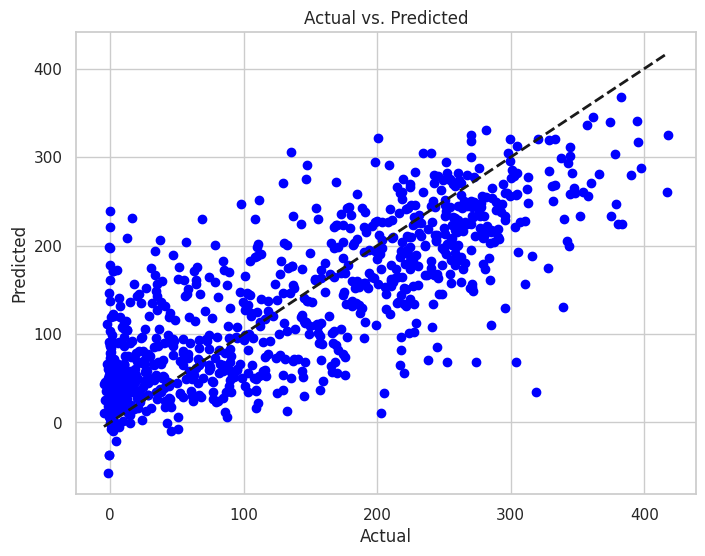

RMSE Training = 67.16086844177518


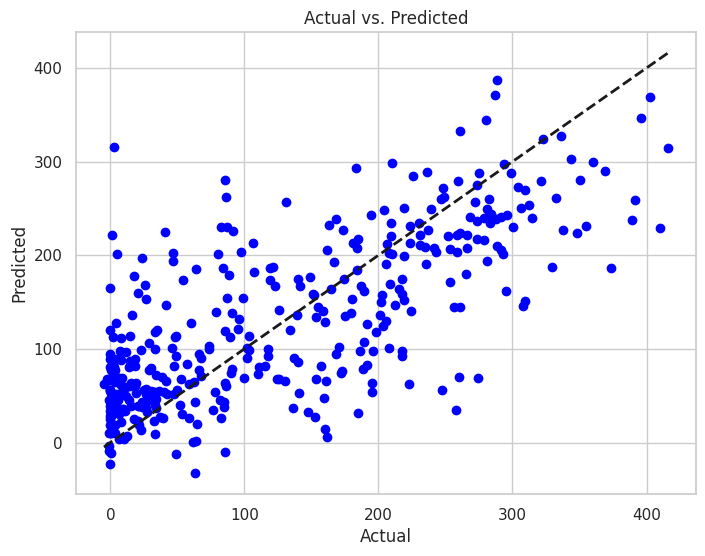

RMSE Testing = 74.7768981871642


In [ ]:
#calls on the model to predict outcome in general
linear_reg(x_train, x_test, y_train, y_test)

In [ ]:

train_qb = qb_df[qb_df['season']!=2022]
test_qb = qb_df[qb_df['season']==2022]

In [ ]:
# Saving player_id and player_name before dropping them
train_ids_names = train_qb[['player_id', 'player_name']]
test_ids_names = test_qb[['player_id', 'player_name']]

train_X = pd.get_dummies(train_qb.drop(columns=['player_id','player_name','position','season','fantasy_points_ppr_next_season','avg_fantasy_points']),drop_first=True).astype(float)
train_y = train_qb['fantasy_points_ppr_next_season'].astype(float)
test_X = pd.get_dummies(test_qb.drop(columns=['player_id','player_name','position','season','fantasy_points_ppr_next_season','avg_fantasy_points']),drop_first=True).astype(float)
test_y = test_qb['fantasy_points_ppr_next_season'].astype(float)
test_X = test_X.reindex(columns=train_X.columns, fill_value=0)

In [ ]:
#plot_of_results
def top_predictions(results):
  melted_results = pd.melt(results, id_vars=['player_id', 'player_name'],
                         value_vars=['actual_fantasy_points', 'predicted_fantasy_points'],
                         var_name='Fantasy Points Type', value_name='Fantasy Points')

  sns.set(style="whitegrid")
  plt.figure(figsize=(12, 6))
  sns.barplot(x='player_name', y='Fantasy Points', hue='Fantasy Points Type', data=melted_results)
  plt.xlabel('Player Name')
  plt.ylabel('Fantasy Points')
  plt.title('Actual vs. Predicted Fantasy Points for Each Player')
  plt.xticks(rotation=90)
  plt.legend()
  plt.tight_layout()
  plt.show()

                                  OLS Regression Results                                  
Dep. Variable:     fantasy_points_ppr_next_season   R-squared:                       0.540
Model:                                        OLS   Adj. R-squared:                  0.511
Method:                             Least Squares   F-statistic:                     18.63
Date:                            Sun, 28 Apr 2024   Prob (F-statistic):          9.94e-148
Time:                                    23:12:56   Log-Likelihood:                -7061.2
No. Observations:                            1232   AIC:                         1.427e+04
Df Residuals:                                1158   BIC:                         1.465e+04
Df Model:                                      73                                         
Covariance Type:                        nonrobust                                         
                                           coef    std err          t      P>|t|      [0.0

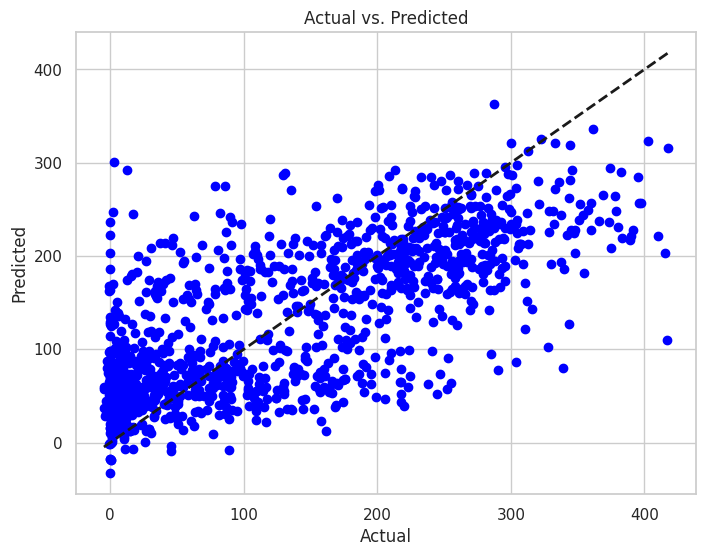

RMSE Training = 74.62985256598022


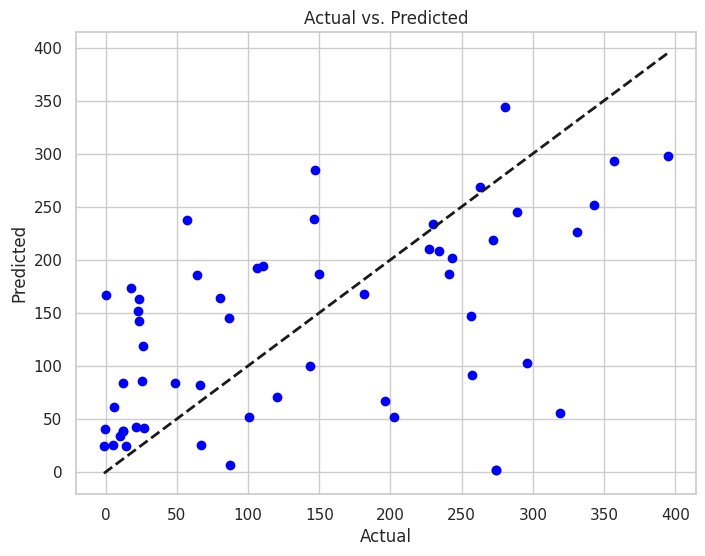

RMSE Testing = 105.89000205612055


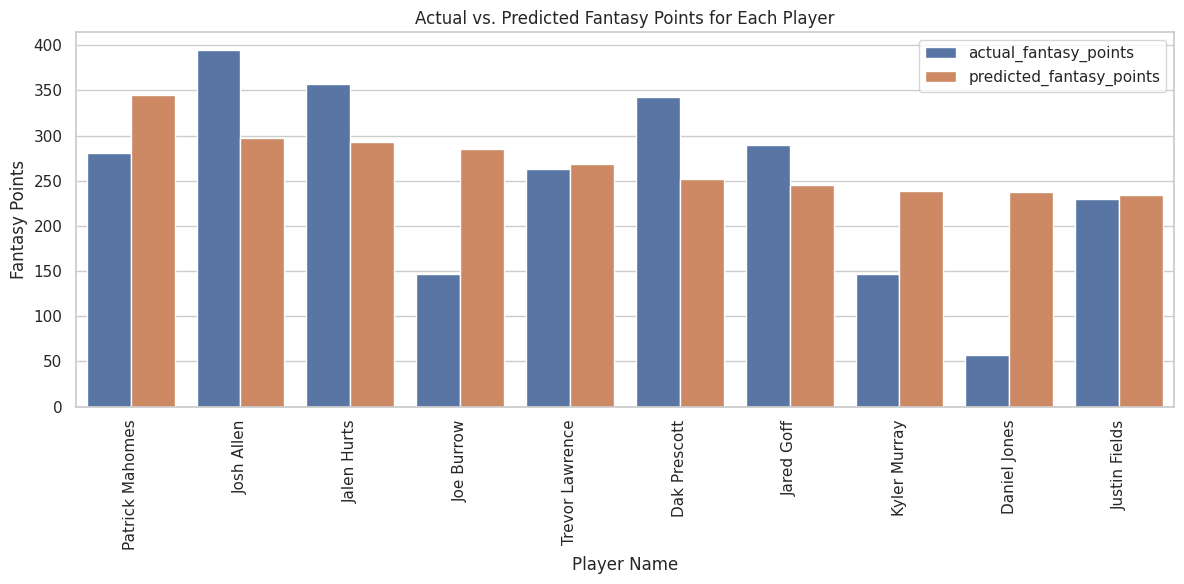

In [ ]:
#predicts outcome for the 2023 season
linear_reg(train_X, test_X, train_y, test_y, test_ids_names)

### Random Forest

In [ ]:
#random forrest regression model
def randomforest(train_X, test_X, train_y, test_y, test_ids_names):
    # Create RandomForestRegressor object with configuration
    regressor = RandomForestRegressor(max_depth=10, criterion="squared_error", oob_score=True, bootstrap=True)
    regressor.fit(train_X, train_y)

    # Access the OOB Score
    oob_score = regressor.oob_score_
    print(f'Out-of-Bag Score: {oob_score}')

    # Making predictions on the test data
    predictions = regressor.predict(test_X)

    # Evaluating the model
    mse = sklearn.metrics.mean_squared_error(test_y, predictions)
    print(f'Root Mean Squared Error: {math.sqrt(mse)}')

    r2 = r2_score(test_y, predictions)
    print(f'R-squared: {r2}')

    # Prepare DataFrame to show predictions with player information
    results = pd.DataFrame({
        'player_id': test_ids_names['player_id'],
        'player_name': test_ids_names['player_name'],
        'actual_fantasy_points': test_y,
        'predicted_fantasy_points': predictions
    })

    results['actual_points_rank'] = results['actual_fantasy_points'].rank(ascending=False)
    results['predicted_points_rank'] = results['predicted_fantasy_points'].rank(ascending=False)
    results = results.sort_values('predicted_fantasy_points',ascending=False)
    top = results.head(10)

    top_predictions(top)
    prediction_scatterplot(test_y, predictions)
    return results


Out-of-Bag Score: 0.49410556850580933
Root Mean Squared Error: 99.37789391432895
R-squared: 0.2811454628191925


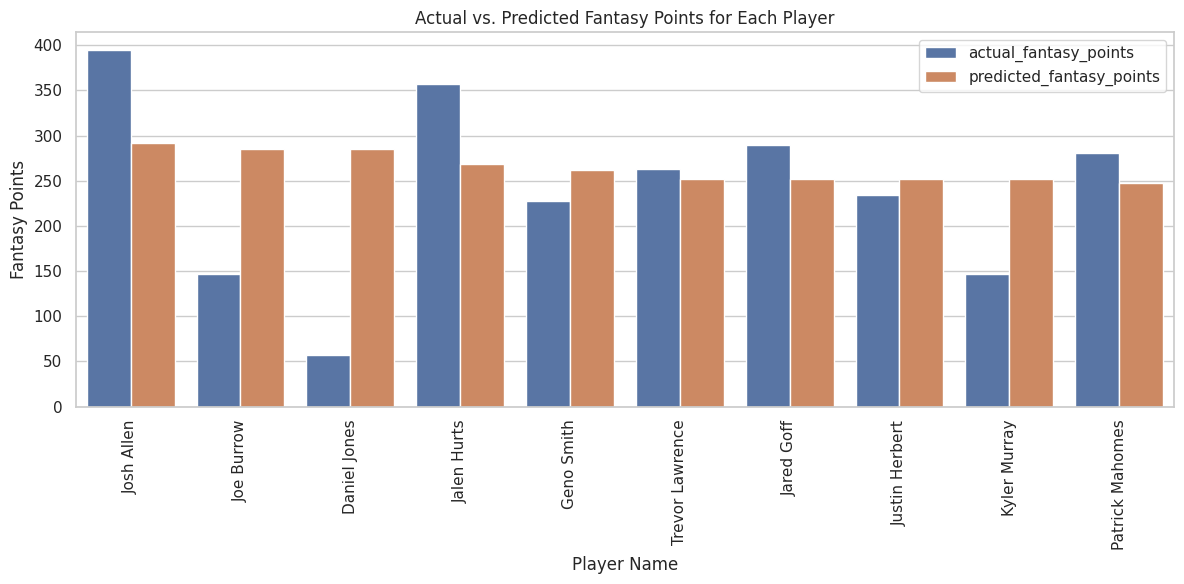

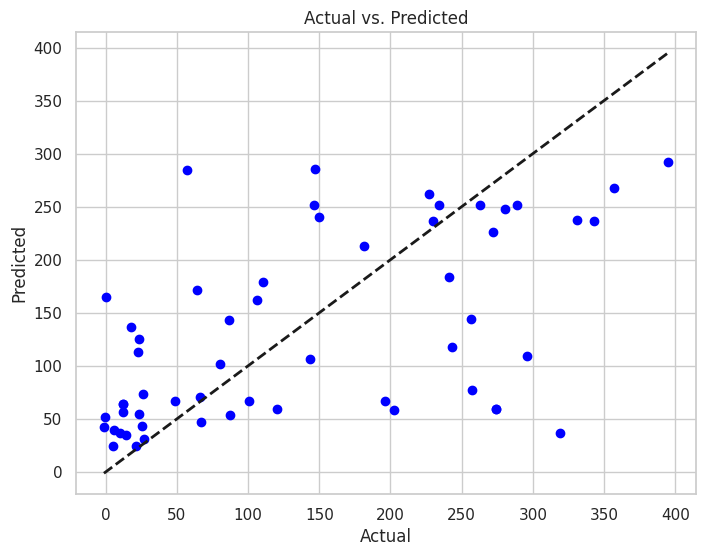

In [ ]:
results = randomforest(train_X, test_X, train_y, test_y, test_ids_names)


In [ ]:
results.sort_values('predicted_fantasy_points',ascending=False)

player_id        player_name  actual_fantasy_points  \
1236  00-0034857         Josh Allen                 394.64   
1274  00-0036442         Joe Burrow                 147.16   
1257  00-0035710       Daniel Jones                  56.96   
1271  00-0036389        Jalen Hurts                 356.82   
1077  00-0030565         Geno Smith                 227.26   
1280  00-0036971    Trevor Lawrence                 262.54   
1167  00-0033106         Jared Goff                 289.10   
1268  00-0036355     Justin Herbert                 234.16   
1245  00-0035228       Kyler Murray                 146.36   
1201  00-0033873    Patrick Mahomes                 280.22   
1019  00-0029604       Kirk Cousins                 149.74   
1225  00-0034796      Lamar Jackson                 331.22   
1158  00-0033077       Dak Prescott                 342.84   
1278  00-0036945      Justin Fields                 230.18   
1263  00-0036212     Tua Tagovailoa                 272.36   
1288  00-0038122     Desmond Ridder                 181.14   
1095  00-0031280         Derek Carr                 241.12   
1287  00-0038102      Kenny Pickett                 110.20   
1104  00-0031345    Jimmy Garoppolo                  64.10   
655   00-0023459      Aaron Rodgers                   0.00   
1282  00-0036972          Mac Jones                 106.40   
998   00-0029263     Russell Wilson                 256.90   
1189  00-0033537     Deshaun Watson                  86.80   
1276  00-0036898        Davis Mills                  17.82   
958   00-0027973        Andy Dalton                  23.64   
869   00-0026498   Matthew Stafford                 243.10   
1174  00-0033119    Jacoby Brissett                  22.86   
1286  00-0037834        Brock Purdy                 295.60   
1184  00-0033357        Taysom Hill                 143.52   
1053  00-0029701     Ryan Tannehill                  80.04   
1285  00-0037077         Sam Howell                 257.54   
1151  00-0032950       Carson Wentz                  26.12   
1125  00-0031800    Taylor Heinicke                  66.00   
842   00-0026158         Joe Flacco                 100.84   
1250  00-0035289    Gardner Minshew                 196.20   
1195  00-0033869  Mitchell Trubisky                  48.68   
1139  00-0032268     Marcus Mariota                  11.76   
1140  00-0032268     Marcus Mariota                  11.76   
1231  00-0034855     Baker Mayfield                 274.06   
1230  00-0034855     Baker Mayfield                 274.06   
1284  00-0037013        Zach Wilson                 119.94   
1210  00-0033949       Joshua Dobbs                 202.66   
1118  00-0031503     Jameis Winston                  11.96   
1241  00-0034869        Sam Darnold                  23.38   
975   00-0028118       Tyrod Taylor                  87.34   
1086  00-0031237  Teddy Bridgewater                  -0.20   
1179  00-0033319       Nick Mullens                  66.74   
1260  00-0035993      Tyler Huntley                  25.62   
1217  00-0034577         Kyle Allen                  -1.30   
943   00-0027948     Blaine Gabbert                   5.90   
987   00-0028986        Case Keenum                   9.74   
1265  00-0036264        Jordan Love                 319.06   
1144  00-0032436       Jeff Driskel                  13.94   
1131  00-0032156     Trevor Siemian                  26.96   
884   00-0026625        Brian Hoyer                   4.94   
1207  00-0033936      C.J. Beathard                  21.46   

      predicted_fantasy_points  actual_points_rank  predicted_points_rank  
1236                292.283117                 1.0                    1.0  
1274                285.627029                24.0                    2.0  
1257                284.947981                37.0                    3.0  
1271                268.042291                 2.0                    4.0  
1077                262.241770                19.0                    5.0  
1280            

### XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


In [ ]:
def xgboost(train_X, test_X, train_y, test_y, test_ids_names ):
  xg_reg = xgb.XGBRegressor(objective = "reg:squarederror",n_estimators = 10,random_state=0)
  xg_reg.fit(train_X,train_y)
  feature_importance = [(train_X.columns[i], item) for i, item in enumerate(xg_reg.feature_importances_)]

  sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
  for feature, importance in sorted_feature_importance:
    print("{0:s}: {1:.6f}".format(feature, importance))
  features = [feature[0] for feature in sorted_feature_importance]
  importance_scores = [feature[1] for feature in sorted_feature_importance]
  plt.figure(figsize=(10, 6))
  plt.barh(features[:20], importance_scores[:20], color='skyblue')
  plt.xlabel('Feature Importance Score')
  plt.ylabel('Features')
  plt.title('Feature Importance')
  plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
  plt.show()



  xgb_params = {
    'colsample_bytree': [0.8, 0.7,0.6],
    'n_estimators': [60,70,80],
    'max_depth': [4,5,7]
}

  xgb_grid = GridSearchCV(
      estimator = xg_reg, param_grid =  xgb_params, scoring="neg_mean_squared_error",cv=4,verbose=1
  )
  xgb_grid.fit(train_X, train_y)

  # Get best estimator from grid search
  best_xgb_reg = xgb_grid.best_estimator_

  # Make predictions on test data
  Y_pred = best_xgb_reg.predict(test_X)
  mse = sklearn.metrics.mean_squared_error(test_y, Y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(test_y, Y_pred)


  print("Root Mean Squared Error:", rmse)
  print("R-squared:", r2)


  prediction_scatterplot(test_y, Y_pred)

  results = pd.DataFrame({
    'player_id': test_ids_names['player_id'],
    'player_name': test_ids_names['player_name'],
    'actual_fantasy_points': test_y,
    'predicted_fantasy_points': Y_pred
})

  results['actual_points_rank'] = results['actual_fantasy_points'].rank(ascending=False)
  results['predicted_points_rank'] = results['predicted_fantasy_points'].rank(ascending=False)
  results = results.sort_values('predicted_fantasy_points',ascending=False)
  top = results.head(10)

  top_predictions(top)
  #results.sort_values('predicted_fantasy_points',ascending=False)

  return xgb_grid




starter_or_backup: 0.545127
fantasy_points_per_game: 0.031332
binned_draft_pick_Early 1st Round: 0.028316
binned_draft_pick_Third Round: 0.023435
rushing_fumbles_lost: 0.014649
year_in_league: 0.012489
binned_draft_pick_Early Second Round: 0.012355
injury type_shoulder: 0.011685
binned_weight_240-259: 0.011236
wins: 0.010617
new_team: 0.010564
passing_epa: 0.010382
binned_weight_180-199: 0.010373
injury type_knee: 0.010282
binned_height_78-80: 0.010255
binned_draft_pick_Undrafted: 0.010160
pacr: 0.010050
binned_draft_pick_Late Second Round: 0.009987
rushing_epa: 0.009753
injury type_leg: 0.009438
injury type_back: 0.009437
binned_draft_pick_Late First Round: 0.009385
binned_weight_260-279: 0.009251
years_coached: 0.009086
rushing_yards: 0.008151
passing_yards_after_catch: 0.008104
interceptions: 0.007992
binned_weight_200-219: 0.007896
fantasy_points_ppr: 0.007887
injury type_neck: 0.007874
sacks: 0.007859
rushing_tds: 0.007750
injured: 0.007544
binned_draft_pick_Fourth Round: 0.007419

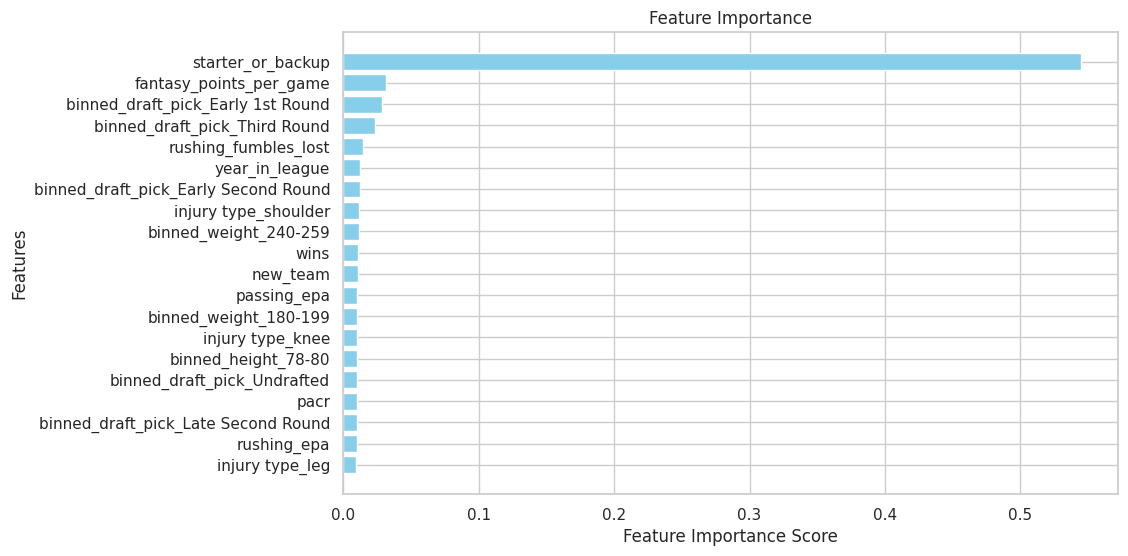

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Root Mean Squared Error: 109.0571434206285
R-squared: 0.1342954967972474


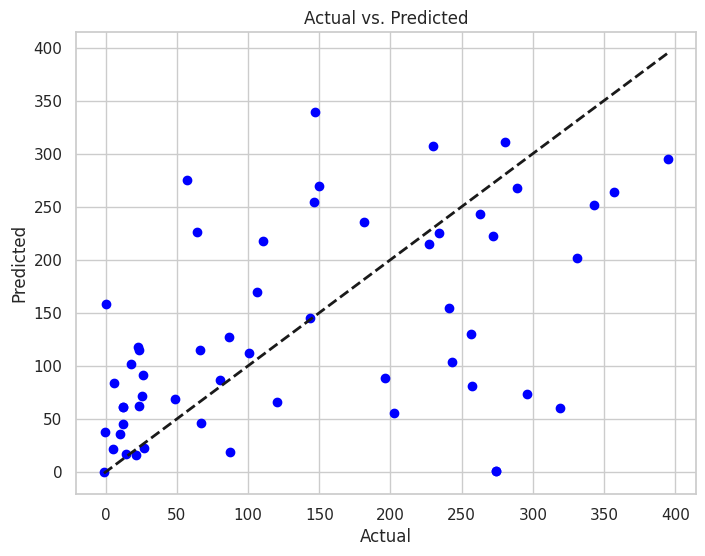

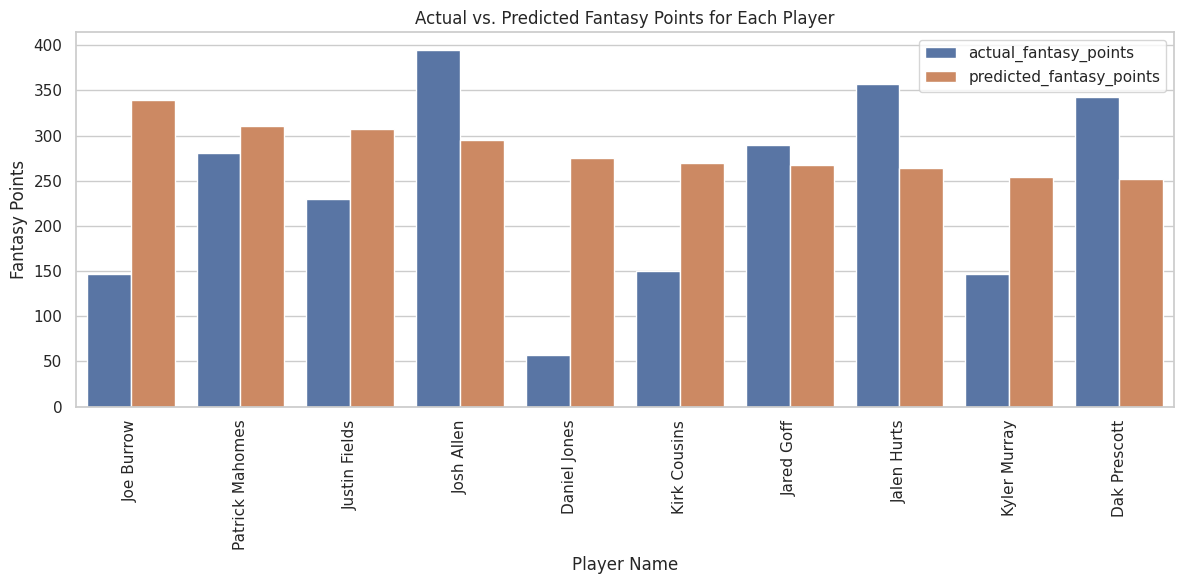

In [ ]:
xg_results = xgboost(train_X, test_X, train_y, test_y, test_ids_names )
#print(xg_results)

### Gradient Boosting

In [ ]:
def gradientboosting(train_X, test_X, train_y, test_y, test_ids_names):
  gb = GradientBoostingRegressor(max_depth=4, n_estimators=200,random_state=2)
  gb.fit(train_X,train_y)
  feature_importance = [(train_X.columns[i], item) for i, item in enumerate(gb.feature_importances_)]

  sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
  for feature, importance in sorted_feature_importance:
    print("{0:s}: {1:.6f}".format(feature, importance))
  features = [feature[0] for feature in sorted_feature_importance]
  importance_scores = [feature[1] for feature in sorted_feature_importance]
  plt.figure(figsize=(10, 6))
  plt.barh(features[:20], importance_scores[:20], color='skyblue')
  plt.xlabel('Feature Importance Score')
  plt.ylabel('Features')
  plt.title('Feature Importance')
  plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
  plt.show()
  gb_params = {
      'max_depth':[4,5],
      'n_estimators':[250,275],
      'subsample':[0.75,0.8],
              'max_features':[0.2]
  }

  gb_grid = GridSearchCV(
      estimator = gb, param_grid =  gb_params, scoring="neg_mean_squared_error",cv=5,verbose=1
      )

  gb_grid.fit(train_X, train_y)

  # Get best estimator from grid search
  best_gb_reg = gb_grid.best_estimator_

  # Make predictions on test data
  Y_pred = best_gb_reg.predict(test_X)
  mse = sklearn.metrics.mean_squared_error(test_y, Y_pred)


  # Evaluate performance

  rmse = np.sqrt(mse)
  r2 = r2_score(test_y, Y_pred)


  print("Root Mean Squared Error:", rmse)
  print("R-squared:", r2)

  prediction_scatterplot(test_y, Y_pred)

  results = pd.DataFrame({
  'player_id': test_ids_names['player_id'],
  'player_name': test_ids_names['player_name'],
  'actual_fantasy_points': test_y,
  'predicted_fantasy_points': Y_pred
})

  results['actual_points_rank'] = results['actual_fantasy_points'].rank(ascending=False)
  results['predicted_points_rank'] = results['predicted_fantasy_points'].rank(ascending=False)
  results = results.sort_values('predicted_fantasy_points',ascending=False)
  top = results.head(10)

  top_predictions(top)
  #results.sort_values('predicted_fantasy_points',ascending=False)

  return gb_grid

starter_or_backup: 0.469314
fantasy_points_per_game: 0.105121
passing_epa: 0.046755
rushing_epa: 0.045983
fantasy_points_ppr: 0.038617
year_in_league: 0.029599
passing_yards_after_catch: 0.026940
rushing_yards: 0.026459
interceptions: 0.024283
sacks: 0.022503
pacr: 0.022227
wins: 0.016713
years_coached: 0.015246
sack_fumbles: 0.010165
new_team: 0.009783
games_played: 0.009044
rushing_tds: 0.008605
injured: 0.005953
rushing_fumbles: 0.004635
binned_weight_260-279: 0.004576
rushing_fumbles_lost: 0.004465
binned_draft_pick_Third Round: 0.004274
passing_2pt_conversions: 0.003917
injury type_shoulder: 0.003845
binned_draft_pick_Late First Round: 0.003200
binned_draft_pick_Undrafted: 0.003001
binned_weight_200-219: 0.002596
binned_draft_pick_Late Second Round: 0.002293
rushing_1000_yards: 0.002253
binned_draft_pick_Early 1st Round: 0.001655
binned_weight_180-199: 0.001625
binned_weight_220-239: 0.001584
binned_draft_pick_Fifth Round: 0.001533
changed_teams_midseason: 0.001516
injury type_acl

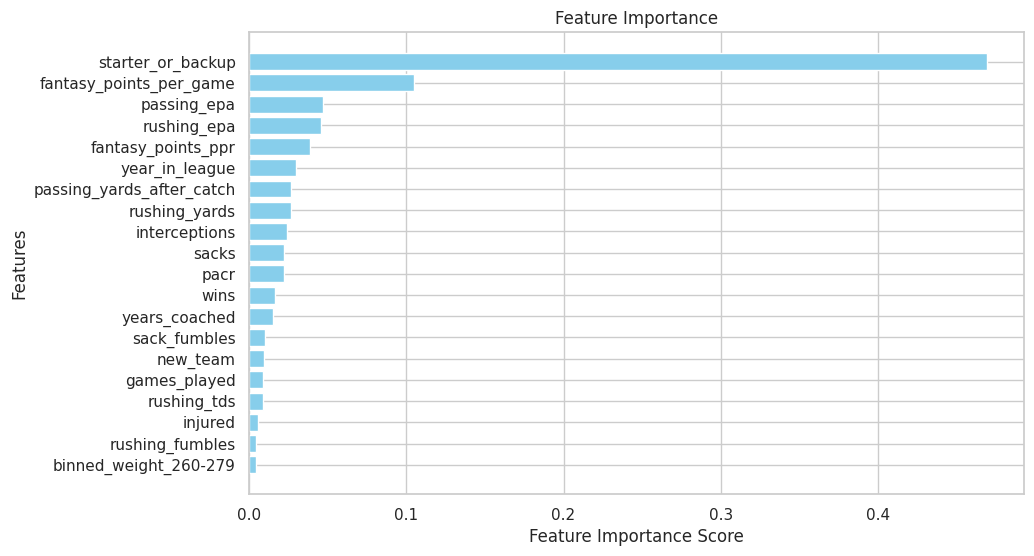

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Root Mean Squared Error: 101.506789977088
R-squared: 0.2500166379816663


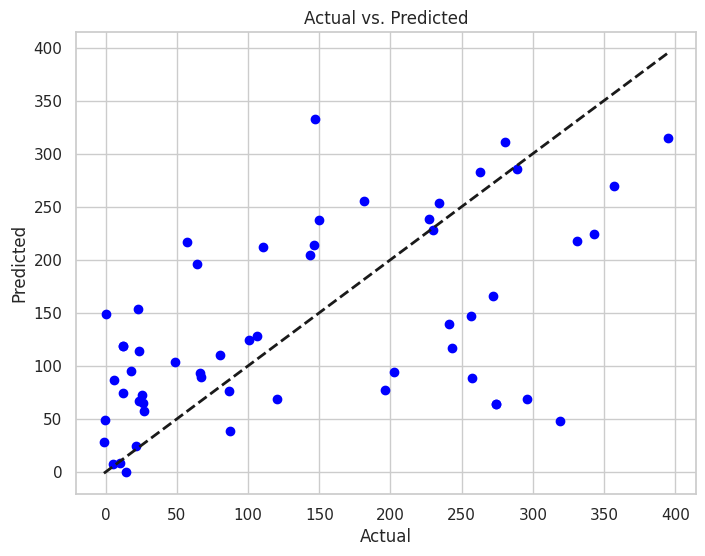

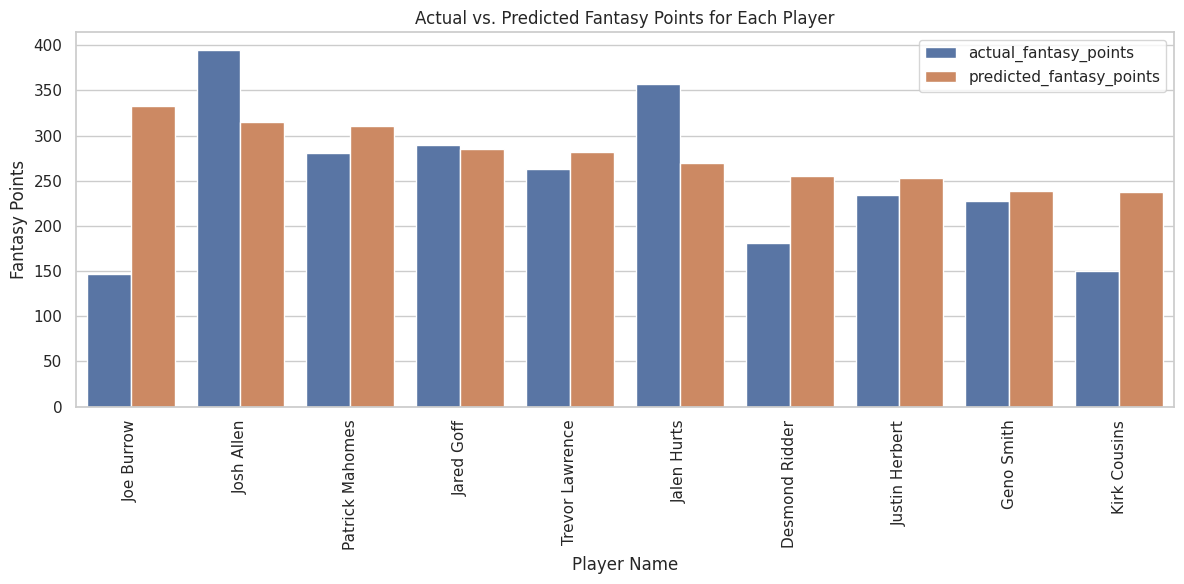

In [ ]:
gb_results = gradientboosting(train_X, test_X, train_y, test_y, test_ids_names)

### Voting Regression

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
def votingregressor(xgb_results, gb_results):
# After multiple trials xgb and gradient boosting were most successful models which is why they are the models used in the voting regressor

  regressors = [ ('XGBRegressor',xgb_results),('GradientBoostingRegressor',gb_results)]

  # Combing variables in a voting regression was the most effective method for minimizing RMSE

  vr = VotingRegressor(estimators=regressors)
  vr.fit(train_X, train_y)
  Y_pred = vr.predict(test_X)
  mse = sklearn.metrics.mean_squared_error(test_y, Y_pred)


  # Evaluate performance

  rmse = np.sqrt(mse)
  r2 = r2_score(test_y, Y_pred)


  print("Root Mean Squared Error:", rmse)
  print("R-squared:", r2)

  prediction_scatterplot(test_y, Y_pred)

  results = pd.DataFrame({
  'player_id': test_ids_names['player_id'],
  'player_name': test_ids_names['player_name'],
  'actual_fantasy_points': test_y,
  'predicted_fantasy_points': Y_pred
  })

  results['actual_points_rank'] = results['actual_fantasy_points'].rank(ascending=False)
  results['predicted_points_rank'] = results['predicted_fantasy_points'].rank(ascending=False)
  results = results.sort_values('predicted_fantasy_points',ascending=False)
  top = results.head(10)

  top_predictions(top)
  #results.sort_values('predicted_fantasy_points',ascending=False)

In [ ]:
votingregressor(xg_results, gb_results )

Fitting 4 folds for each of 27 candidates, totalling 108 fits


## Wide Receiver and Tight End Analysis

### Regression

In [ ]:
#this drops all the rookie data
wr_df.dropna(axis = 0, inplace=True)

In [ ]:
#converts all the categorical and binned data
x = pd.get_dummies(wr_df.drop(columns=['player_id', 'player_name','season',
                                     'fantasy_points_ppr_next_season','fantasy_points_per_game']),drop_first=True).astype(float)
y = wr_df['fantasy_points_ppr_next_season'].astype(float)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 0)

In [ ]:
multiocollinearity(x)

In [ ]:
linear_reg(x_train, x_test, y_train, y_test)

In [ ]:
train_wr = wr_df[wr_df['season']!=2022]
test_wr = wr_df[wr_df['season']==2022]

In [ ]:
# Saving player_id and player_name before dropping them
train_ids_names = train_wr[['player_id', 'player_name']]
test_ids_names = test_wr[['player_id', 'player_name']]

train_X = pd.get_dummies(train_wr.drop(columns=['player_id','player_name','season','fantasy_points_ppr_next_season','avg_fantasy_points', 'fantasy_points_per_game']),drop_first=True).astype(float)
train_y = train_wr['fantasy_points_ppr_next_season'].astype(float)
test_X = pd.get_dummies(test_wr.drop(columns=['player_id','player_name','season','fantasy_points_ppr_next_season','avg_fantasy_points', 'fantasy_points_per_game']),drop_first=True).astype(float)
test_y = test_wr['fantasy_points_ppr_next_season'].astype(float)
test_X = test_X.reindex(columns=train_X.columns, fill_value=0)

In [ ]:
#predicts outcome for the 2023 season
linear_reg(train_X, test_X, train_y, test_y, test_ids_names)

### Random Forest

In [ ]:
results = randomforest(train_X, test_X, train_y, test_y, test_ids_names)

# Display results
print(results.head())

In [ ]:
results.sort_values('predicted_fantasy_points',ascending=False).head(60)

### XGBoost

In [ ]:
xg_results = xgboost(train_X, test_X, train_y, test_y, test_ids_names )

### Gradient Boosting

In [ ]:
gb_results = gradientboosting(train_X, test_X, train_y, test_y, test_ids_names)

### Voting Regression

In [ ]:
votingregressor(xg_results, gb_results )

## Running Back Analysis

### Regression

In [ ]:
#this drops all the rookie data
rb_df.dropna(axis = 0, inplace=True)

In [ ]:
rb_df.info()

In [ ]:
x = pd.get_dummies(rb_df.drop(columns=['player_id', 'player_name','season',
                                     'fantasy_points_ppr_next_season', 'fantasy_points_per_game']),drop_first=True).astype(float)
y = rb_df['fantasy_points_ppr_next_season'].astype(float)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 0)

In [ ]:
multiocollinearity(x)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


feature    games_played
VIF            2.729624
Name: 0, dtype: object
feature     injured
VIF        1.719372
Name: 1, dtype: object
feature    new_team
VIF        1.244052
Name: 2, dtype: object
feature    QB_4000_yards
VIF              1.30546
Name: 3, dtype: object
feature    Receiving_1000_yards
VIF                    1.193475
Name: 4, dtype: object
feature        racr
VIF        1.079215
Name: 5, dtype: object
feature    target_share
VIF            2.935484
Name: 6, dtype: object
feature    air_yards_share
VIF               1.917585
Name: 7, dtype: object
feature        wopr
VIF        5.738886
Name: 8, dtype: object
feature    rushing_fumbles
VIF               1.993698
Name: 9, dtype: object
feature    rushing_epa
VIF           1.500183
Name: 10, dtype: object
feature    rushing_2pt_conversions
VIF                       1.080866
Name: 11, dtype: object
feature    receiving_tds
VIF             2.036059
Name: 12, dtype: object
feature    receiving_fumbles
VIF                 1.208

feature       VIF
0                      games_played  2.729624
1                           injured  1.719372
2                          new_team  1.244052
3                     QB_4000_yards  1.305460
4              Receiving_1000_yards  1.193475
..                              ...       ...
70   binned_draft_pick_Fourth Round  3.359804
71    binned_draft_pick_Fifth Round  2.578462
72    binned_draft_pick_Sixth Round  2.380104
73  binned_draft_pick_Seventh Round  1.975554
74      binned_draft_pick_Undrafted  4.575847

[75 rows x 2 columns]

                                  OLS Regression Results                                  
Dep. Variable:     fantasy_points_ppr_next_season   R-squared:                       0.493
Model:                                        OLS   Adj. R-squared:                  0.466
Method:                             Least Squares   F-statistic:                     17.87
Date:                            Sun, 28 Apr 2024   Prob (F-statistic):          2.10e-141
Time:                                    23:19:51   Log-Likelihood:                -7470.3
No. Observations:                            1337   AIC:                         1.508e+04
Df Residuals:                                1267   BIC:                         1.544e+04
Df Model:                                      69                                         
Covariance Type:                        nonrobust                                         
                                           coef    std err          t      P>|t|      [0.0

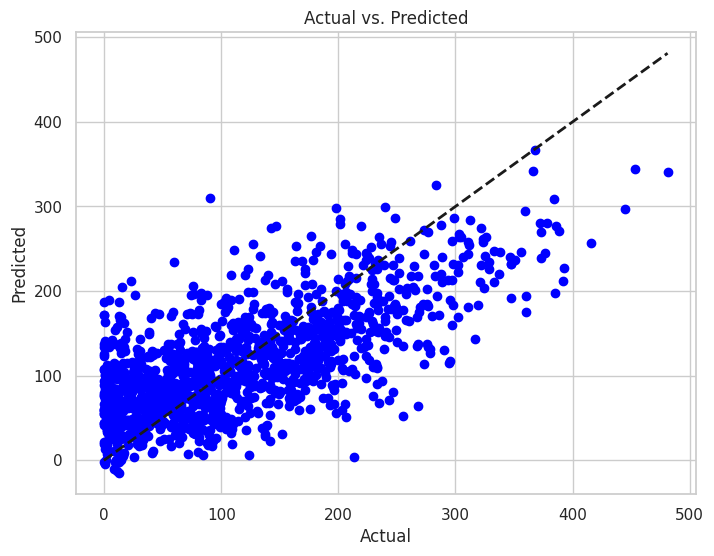

RMSE Training = 64.61351961467899


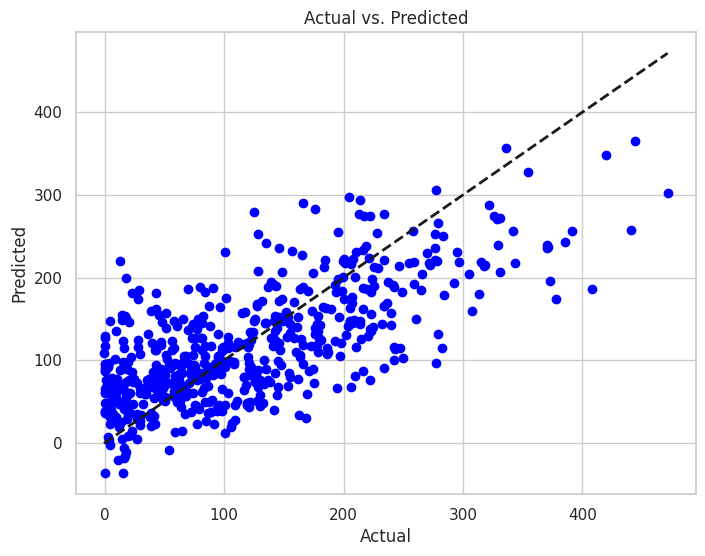

RMSE Testing = 65.82488742744187


In [ ]:
linear_reg(x_train, x_test, y_train, y_test)

In [ ]:
train_rb = rb_df[rb_df['season']!=2022]
test_rb = rb_df[rb_df['season']==2022]

In [ ]:
# Saving player_id and player_name before dropping them
train_ids_names = train_rb[['player_id', 'player_name']]
test_ids_names = test_rb[['player_id', 'player_name']]

train_X = pd.get_dummies(train_rb.drop(columns=['position','player_id','player_name','season','fantasy_points_ppr_next_season','avg_fantasy_points','fantasy_points_per_game' ]),drop_first=True).astype(float)
train_y = train_rb['fantasy_points_ppr_next_season'].astype(float)
test_X = pd.get_dummies(test_rb.drop(columns=['position','player_id','player_name','season','fantasy_points_ppr_next_season','avg_fantasy_points','fantasy_points_per_game']),drop_first=True).astype(float)
test_y = test_rb['fantasy_points_ppr_next_season'].astype(float)
test_X = test_X.reindex(columns=train_X.columns, fill_value=0)

In [ ]:
#predicts outcome for the 2023 season
linear_reg(train_X, test_X, train_y, test_y, test_ids_names)

### Random Forest

In [ ]:
results = randomforest(train_X, test_X, train_y, test_y, test_ids_names)

# Display results
print(results.head())

In [ ]:
results.sort_values('predicted_fantasy_points',ascending=False).head(60)

### XGBoost

In [ ]:
xg_results = xgboost(train_X, test_X, train_y, test_y, test_ids_names )

### Gradient Boosting

In [ ]:
gb_results = gradientboosting(train_X, test_X, train_y, test_y, test_ids_names)

### Voting Regression

In [ ]:
votingregressor(xg_results, gb_results )

# Results - This section involves analysis on our model. It contributes to requirements 7 and 9

3 Biases:
1. Designating an injury severity type may be subjective. If a player was injured more than once, the more severe injury was selected for the injury data set.
2. An injury that occured towards the end of the year, the severity of the injury is hard to judge if it was a true season ending injury or an injury that would have resulted a few weeks absense.
3. The coaching dataset only takes the head coach into account, not the team's offensive coordinator or positional coaches.


3 Privacy Concerns:
1. We are using data surrounding hometown and colleges attended for many former or current NFL players without their consent.
2. We are using health data surrounding injuries for many former or current NFL players without their consent
3. We are using personal information like birthday, height, and weight for many former or current NFL players without their consent.

3 Ethical Concerns:
1. We are using the personel data surrounding demographics and injuries for many former or current NFL players without their consent.
2. The model we are developing will eventually be used to predict 2024 stats before the season starts, which may lead people to gamble based of the model's findings when there is no guarentee of winning.
3. We will not be able to test the accuracy of the model until the end of the 2024 season, but fantasy players would need to use the findings of the model before the season starts to draft a team.

Results Analysis:
  Our models had mixed results. The machine learning models were very good at predicting wide receiver output. With the models having R squared values around .50 and above. It would be unrealisitc to expect it to produce exact fantasy values so that output is very good. It was also very good guessing which players would finish in the top 10, with the ones it got wrong being players like Justin Jefferson who was injured for a few games. The running back and quarterback models were not as strong. Both models had R squared values of around   .2 - .25 which was a lot less than the wide receiver models. Some of this is most likely to do which the amount of injuries to key players at those positions. Players like Nick Chubb, Daniel Jones, Joe Burrow, and Kirk Cousins had unexpected injuries that hurt the model. It also could be that wide receivers are simply an easier position to predict fantasy output for. Lastly, football is a hard sport to predict in general, so we were very happy with the model performance given the data that we had.